# NAVER 뉴스 데이터를 이용하여서 데이터 추출하기

## BeautifulSoup, Requests, Pandas 모듈 생성하기

데이터베이스 불러오기

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

뉴스별 데이터베이스 부르기

In [3]:
chosun_eilbo_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\chosun_eilbo.csv', encoding='utf-8', index_col=False)
korean_economy_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\korean_economy.csv', encoding='utf-8', index_col=False)
mail_economy_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\mail_economy.csv', encoding='utf-8', index_col=False)
midlle_eilbo_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\middle_eilbo.csv', encoding='utf-8', index_col=False)
money_today_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\money_today.csv', encoding='utf-8', index_col=False)
# chosun_eilbo_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\chosun_eilbo.csv', encoding='cp949', index_col=False)
# korean_economy_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\korean_economy.csv', encoding='utf-8', index_col=False)
# mail_economy_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\mail_economy.csv', encoding='utf-8', index_col=False)
# midlle_eilbo_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\middle_eilbo.csv', encoding='utf-8', index_col=False)
# money_today_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\money_today.csv', encoding='utf-8', index_col=False)


데이터베이스 테스트하기

In [4]:
chosun_eilbo_database = chosun_eilbo_database.dropna()
chosun_eilbo_database.tail(10000)

title  \
16734        브라질서 태어난 쌍둥이, 아빠가 다르다…의사 “매우 드문 경우”   
16735     17년만에 돌아온 H.O.T. 강타 “아이돌 시조새 무대 기대하세요”   
16736         두 집을 꽈배기처럼 꼬았다, 시누이·올케 함께 살아도 문제없네   
16737                [시네마 클래식] 여의도로 몰려간 ‘천만 감독들’   
16738     [윤희영의 News English] 알약을 물 없이 삼켜도 된다고요?   
...                                          ...   
27549               [선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’   
27550       [김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리   
27551                    [차현진의 돈과 세상] [94] 말 한마디   
27552  [김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑   
27553         [수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!   

                                                 content  \
16734  브라질에서 아버지가 다른 쌍둥이가 태어났다. 담당 의사는 “극히 드문 경우”이라며 ...   
16735  1세대 아이돌 그룹 H.O.T. 출신 가수 강타(본명 안칠현)가 7일 4집 새 앨범...   
16736  부산 동래구 명륜동에 있는 동래향교 건너 구도심의 나지막한 주택가. 최근 베이지색 ...   
16737  뉴스레터 ‘시네마 클래식’은 영화와 음악계의 이모저모를 들려드리는 ‘이야기 사랑방’...   
16738  서양 영화를 보노라면 이따금(from time to time) 알약을 물 없이 삼키...   
...                                                  ...   
27549  이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할...   
27550  집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기...   
27551  말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새...   
27552  불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑...   
27553  ‘가장 인간적인 유인원’으로 알려진 보노보 동족 포식 현상 잇따라 목격돼 고등동물에...   

                                                     url  
16734  https://n.news.naver.com/mnews/article/023/000...  
16735  https://n.news.naver.com/mnews/article/023/000...  
16736  https://n.news.naver.com/mnews/article/023/000...  
16737  https://n.news.naver.com/mnews/article/023/000...  
16738  https://n.news.naver.com/mnews/article/023/000...  
...                                                  ...  
27549  https://n.news.naver.com/mnews/article/023/000...  
27550  https://n.news.naver.com/mnews/article/023/000...  
27551  https://n.news.naver.com/mnews/article/023/000...  
27552  https://n.news.naver.com/mnews/article/023/000...  
27553  https://n.news.naver.com/mnews/article/023/000...  

[10000 rows x 3 columns]

In [5]:
korean_economy_database = korean_economy_database.dropna()
korean_economy_database.tail(10000)

title  \
42019        한국산업인력공단, 국제기능올림픽 국내선수 양성·선발 전담   
42020       한국무역보험공사, 美 수출입은행과 '원스톱 협조금융' 구축   
42021  한국농수산식품유통공사, 말레이시아 '프랜차이즈 박람회' 한국관 열어   
42022    [단독] 600억원 투입했는데…'0원' 참담한 제로페이 결제실적   
42023        코로나19로 보건소 마비되자…보건증 수수료 올린 인구협회   
...                                      ...   
52454     [사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당   
52455          [다산칼럼] '기대인플레이션' 정확한 측정이 중요하다   
52456                [포토] 라필루스 샨티, '매력적인 미소'   
52457                [시론] 북한의 우발적 핵 공격에 대비해야   
52458                       [한경에세이] 크리에이터 세상   

                                                 content  \
42019  해 제46회 국제기능올림픽은 한국을 비롯해 15개국 26개 도시에서 공동 개최된다....   
42020  한국무역보험공사(무보)는 수출기업의 해외 진출 길을 넓히기 위해 미국 수출입은행과 ...   
42021  한국농수산식품유통공사(aT)는 농림축산식품부와 함께 프랜차이즈 박람회 참가사업을 통...   
42022  소상공인 수수료 절감을 목적으로 정부 주도로 도입된 간편 결제 시스템 ‘제로페이’가...   
42023  인구보건복지협회의 일부 지회가 코로나19를 틈타 보건증 발급 수수료를 대폭 인상해 ...   
...                                                  ...   
52454  더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 ...   
52455  현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불...   
52456  그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M...   
52457  컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한...   
52458  K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 ...   

                                                     url  
42019  https://n.news.naver.com/mnews/article/015/000...  
42020  https://n.news.naver.com/mnews/article/015/000...  
42021  https://n.news.naver.com/mnews/article/015/000...  
42022  https://n.news.naver.com/mnews/article/015/000...  
42023  https://n.news.naver.com/mnews/article/015/000...  
...                                                  ...  
52454  https://n.news.naver.com/mnews/article/015/000...  
52455  https://n.news.naver.com/mnews/article/015/000...  
52456  https://n.news.naver.com/mnews/article/015/000...  
52457  https://n.news.naver.com/mnews/article/015/000...  
52458  https://n.news.naver.com/mnews/article/015/000...  

[10000 rows x 3 columns]

In [6]:
mail_economy_database = mail_economy_database.dropna()
mail_economy_database.tail(10000)

title  \
44241          생방송 중 카메라 팽개치고 어디론가 달려가는 '카메라맨'…무슨일이   
44242     대신증권 "HMM, 4분기부터 실적 급감...목표가 2만9000원→2만원"   
44243     네이버, 북미 1위 중고거래 플랫폼 '포쉬마크' 인수…총 인수금 16억달러   
44244                         르세라핌 홍은채 코로나19 확진[전문]   
44245  "해외판 '아빠찬스' 이런 것도 있었네"…'코드 37205' 해외송금 年 5조↑   
...                                             ...   
54581        [사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야   
54582          대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]   
54583       [사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색   
54584                [오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠   
54585                   [오늘의 MBN] 산에서 경마 중독 이겨낸 자연인   

                                                 content  \
44241  호주의 한 카메라맨이 방송 도중 장비를 땅에 내려놓고 갑자기 어디론가 달려가는 장면...   
44242  대신증권은 4일 HMM에 대한 목표주가를 당초 2만9000원에서 2만원으로 낮춰잡았...   
44243  네이버가 북미 최대 패션 C2C 플랫폼 '포쉬마크'를 인수한다고 4일 밝혔다. 네이...   
44244  걸그룹 르세라핌 멤버 홍은채가 코로나19에 확진돼 일부 스케줄에 불참한다. 3일 소...   
44245  은행서 한번에 937만원씩 증여성 해외송금 이뤄져 최근 5년간 '코드 37205'로...   
...                                                  ...   
54581  윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환...   
54582  더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 ...   
54583  시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에...   
54584  ■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가...   
54585  ■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연...   

                                                     url  
44241  https://n.news.naver.com/mnews/article/009/000...  
44242  https://n.news.naver.com/mnews/article/009/000...  
44243  https://n.news.naver.com/mnews/article/009/000...  
44244  https://n.news.naver.com/mnews/article/009/000...  
44245  https://n.news.naver.com/mnews/article/009/000...  
...                                                  ...  
54581  https://n.news.naver.com/mnews/article/009/000...  
54582  https://n.news.naver.com/mnews/article/009/000...  
54583  https://n.news.naver.com/mnews/article/009/000...  
54584  https://n.news.naver.com/mnews/article/009/000...  
54585  https://n.news.naver.com/mnews/article/009/000...  

[10000 rows x 3 columns]

In [8]:
midlle_eilbo_database = midlle_eilbo_database.dropna()
midlle_eilbo_database.tail(10000)

title  \
18324            아파트선 서울 영등포동1가…수도권 '깡통전세 주의보' 어디   
18325           "양털 뭉치인가?" 뉴질랜드 해변서 발견된 4m 사체의 정체   
18326          "지숙님과 안녕하신가요" 이두희 임금미지급 논란 불 지핀 댓글   
18327  “러, 8년간 선거 개입하려 20여개국 정당·대선 후보에 4170억원 썼다”   
18328           배변 실수한 아이 얼굴에 속옷 문댄 교사…영상도 찍어 올렸다   
...                                           ...   
29008           감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”   
29009          홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험   
29010         국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다   
29011        상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”   
29012       여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”   

                                                 content  \
18324  서울 강서구 등촌동과 영등포구 영등포동1가 등 일부 지역의 평균 전셋값이 매매가격보...   
18325  심해에 사는 거대한 대왕오징어 사체가 뉴질랜드 해변에서 발견됐다. 13일 라디오뉴질...   
18326  이두희 ‘멋쟁이사자처럼’ 대표가 자신이 최고기술책임자로 있는 NFT 기업 ‘메타콩즈...   
18327  러시아가 지난 2014년부터 최근까지 미국을 제외한 20여개국의 선거에 개입하기 위...   
18328  울산의 한 유치원 교사가 배변 실수를 한 원아의 얼굴에 배변이 묻은 속옷을 들이대며...   
...                                                  ...   
29008  감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하...   
29009  40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍...   
29010  이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남...   
29011  최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대...   
29012  국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 ...   

                                                     url  
18324  https://n.news.naver.com/mnews/article/025/000...  
18325  https://n.news.naver.com/mnews/article/025/000...  
18326  https://n.news.naver.com/mnews/article/025/000...  
18327  https://n.news.naver.com/mnews/article/025/000...  
18328  https://n.news.naver.com/mnews/article/025/000...  
...                                                  ...  
29008  https://n.news.naver.com/mnews/article/025/000...  
29009  https://n.news.naver.com/mnews/article/025/000...  
29010  https://n.news.naver.com/mnews/article/025/000...  
29011  https://n.news.naver.com/mnews/article/025/000...  
29012  https://n.news.naver.com/mnews/article/025/000...  

[10000 rows x 3 columns]

In [7]:
money_today_database = money_today_database.dropna()
money_today_database.tail(10000)

title  \
39170   2008년엔 서브프라임, 지금은 LDI?…채권시장 주목하라[오미주]   
39171       화일약품 화성공장 폭발사고로 20대 근로자 사망·17명 부상   
39172      "주말에 휴대폰 10시간 " 온가족 중독…오은영 "퍼빙 상태"   
39173      [영상]여아 구했다가…"엉덩이 만졌다" 사이버불링 당한 中남성   
39174       '띵동띵동' 민폐…비·김태희 집 초인종 1년간 누른 40대女   
...                                       ...   
49205                        [광화문]청문회 대상은 국회다   
49206                    머니투데이 오프라인 헤드라인-26일자   
49207  [사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다   
49208                      [MT시평]금융업의 본질은 신뢰다   
49209      [투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견   

                                                 content  \
39170  '오미주'는 '오늘 주목되는 미국 주식'의 줄인 말입니다. 주가에 영향을 미칠 만한...   
39171  경기 화성시 화일약품 생산공장에서 폭발 사고가 발생해 1명이 숨지고 17명이 다쳤다...   
39172  온가족이 휴대폰에 중독된 듯한 모습을 보인 금쪽이 가족의 일상이 공개돼 충격을 안겼...   
39173  한 중국 남성이 에스컬레이터에서 떨어지려는 여아를 구했다가 누리꾼에게 "아이의 엉덩...   
39174  가수 겸 배우 비(정지훈)와 배우 김태희 부부가 사는 집을 찾아가 수차례 초인종을 ...   
...                                                  ...   
49205  판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주...   
49206  "대형증권사, 제2 채안펀드 1조 만들라" 촉법소년 '만 13세' 하향…"더 낮춰야...   
49207  34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시...   
49208  동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 ...   
49209  지난 7월말 일본의 하기우다 고이치 경제산업상은 구글 본사를 시찰한 후 기자회견을 ...   

                                                     url  
39170  https://n.news.naver.com/mnews/article/008/000...  
39171  https://n.news.naver.com/mnews/article/008/000...  
39172  https://n.news.naver.com/mnews/article/008/000...  
39173  https://n.news.naver.com/mnews/article/008/000...  
39174  https://n.news.naver.com/mnews/article/008/000...  
...                                                  ...  
49205  https://n.news.naver.com/mnews/article/008/000...  
49206  https://n.news.naver.com/mnews/article/008/000...  
49207  https://n.news.naver.com/mnews/article/008/000...  
49208  https://n.news.naver.com/mnews/article/008/000...  
49209  https://n.news.naver.com/mnews/article/008/000...  

[10000 rows x 3 columns]

표본별 뉴스 제목중 하나 부르기

In [8]:
chosun_eilbo_database.tail(10000)["title"]

16734          브라질서 태어난 쌍둥이, 아빠가 다르다…의사 “매우 드문 경우”
16735       17년만에 돌아온 H.O.T. 강타 “아이돌 시조새 무대 기대하세요”
16736           두 집을 꽈배기처럼 꼬았다, 시누이·올케 함께 살아도 문제없네
16737                  [시네마 클래식] 여의도로 몰려간 ‘천만 감독들’
16738       [윤희영의 News English] 알약을 물 없이 삼켜도 된다고요?
                           ...                    
27549                 [선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’
27550         [김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리
27551                      [차현진의 돈과 세상] [94] 말 한마디
27552    [김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑
27553           [수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!
Name: title, Length: 10000, dtype: object

뉴스 출처 홈페이지 추출하기

In [9]:
chosun_eilbo_database.tail(10000)['url']

16734    https://n.news.naver.com/mnews/article/023/000...
16735    https://n.news.naver.com/mnews/article/023/000...
16736    https://n.news.naver.com/mnews/article/023/000...
16737    https://n.news.naver.com/mnews/article/023/000...
16738    https://n.news.naver.com/mnews/article/023/000...
                               ...                        
27549    https://n.news.naver.com/mnews/article/023/000...
27550    https://n.news.naver.com/mnews/article/023/000...
27551    https://n.news.naver.com/mnews/article/023/000...
27552    https://n.news.naver.com/mnews/article/023/000...
27553    https://n.news.naver.com/mnews/article/023/000...
Name: url, Length: 10000, dtype: object

## 깃허브 오픈소스 이용하기

### 토큰화로 바꾸는 파일 부르기

In [10]:
# $ git clone https://github.com/ukairia777/tensorflow-nlp-tutorial.git
# $ git clone https://github.com/haven-jeon/PyKoSpacing.git
# $ git clone https://github.com/ssut/py-hanspell.git
# %pip install soynlp
# %pip install customized_konlpy
# %pip install tensorflow
# %pip install kss
# %pip install konlpy
# %pip install soynlp
# %pip install customized_konlpy

In [11]:
from tokenization import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']
문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of 

[Korean Sentence Splitter]: Initializing Pynori...


한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']
단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]
OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']
꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'N

In [12]:
from text_preprocessing_tools_for_korean_text import *

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.
1/1 [==============================] - 1s 1s/step
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지
김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나

C:\Users\82105\AppData\Roaming\Python\Python38\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


url 홈페이지 BeautifulSoup을이용해서 소스에 있는 내용 부르기

뉴스 내용항목 중 한국어 불용어 제거하기

In [13]:
from remove_stopwords import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


문장 텍스트 정규화하기

In [14]:
from regular_expression import *

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 
['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [15]:
from integer_encoding import *

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']
[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]
{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}
8
[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## TF-IDF를 이용하여 벡터화하기

In [16]:
from kiwipiepy import Kiwi

In [17]:
from tf_idf import tf, tfidf

단어장의 크기 : 9
['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [18]:
kiwi = Kiwi()
def extract_noun_from_kiwi_analyzed(comment):
    temp_sentence = kiwi.analyze(comment)
    noun_list = [token.form for token in temp_sentence[0][0] if re.match('N', token.tag)]
    return noun_list

## 100개의 특정표본을 이용하여서 처리화하기

### 조선일보 100개의 표본 이용하기

제목 단어 토큰화하기

In [19]:
whole_title_noun = []
for chosun_title in chosun_eilbo_database.head(100)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_title_noun.append(noun)
print(whole_title_noun)

['대나무', '이준석', '변호인', '변호사회', '박지현', '이광재', '시누이', '메탄올', '백악관', '귀국길', '지휘관', '오데사', '아파트', '쑥대밭', '목구멍', '길거리', '대통령', '지지율', '휠체어', '민주당', '이재명', '박지현', '포르노', '위원장', '성적표', '민노총', '녹취록', '서포터즈', '일요일', '아버지', '냉장고', '토요일', '이재명', '우크라', '의용군', '목소리', '구청장', '인터뷰', '오승록', '노원구', '일자리', '바이오', '구청장', '인터뷰', '박강수', '마포구청장', '구청장', '인터뷰', '송파구청', '아파트', '구청장', '인터뷰', '도봉구청', '도봉구', '오페라하우스', '넷플릭스', '창업자', '현대차', '지난달', '반도체', '시뮬레이션', '공무원', '크레인', '스타트업', '대전조차장역', '공무원', '스스로', '기록물', '김어준', '아이파크', '현대산업개발', '취임식', '단체장', '대우조선', '노동자', '이종호', '마지막', '장례식', '모정미씨', '지역민', '호민관', '성희롱', '한미일', '이문열', '연구소', '잿더미', '고등학생', '기증자', '김지수', '창신동', '쪽방촌', '디즈니', '다가구', '다세대', '임차인', '다단계', '조희팔', '사모당', '온라인', '코스피', '러시아', '민형배', '해외여행', '숭례문', '유가족', '어머니', '수면제', '바이든', '노룩악수', '조희연', '대립각', '대부업체', '대통령', '르메이에르', '입주자', '이준석', '대통령', '캐나다', '김건희', '휴가지', '네이버', '토트넘', '라인업']


내용 토큰화하기

In [20]:
whole_content_sentence_list = []
count = 1
for chosun_url in chosun_eilbo_database.head(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    try:
        response_0 = requests.get(chosun_url, headers=headers)
    except OSError:
        print("OS 연결을 끊켰습니다.")
        whole_content_sentence_list.append("")
    except ProtocolError:
        print("프로토콜 연결이 끊켰습니다.")
        whole_content_sentence_list.append("")
    except ConnectionError:
        print("연결이 끊켰습니다.")
        whole_content_sentence_list.append("")
        soup_0 = BeautifulSoup(response_0.text, 'html.parser')
        content_0_data = soup_0.find('div', {"id" : "dic_area"})
        whole_content_sentence_list.append(content_0_data)
    else:
        soup_0 = BeautifulSoup(response_0.text, 'html.parser')
        content_0_data = soup_0.find('div', {"id" : "dic_area"})
        try:
            content_0_data = content_0_data.get_text().strip()
        except AttributeError:
            whole_content_sentence_list.append("")
        else:
            content_0_data = content_0_data.replace('\n','').replace('\t','')
            new_content_0_data = content_0_data.replace(" ", '')
            kospacing_new_content_0_data = spacing(new_content_0_data) 
            words_data = twitter.morphs(kospacing_new_content_0_data)
            with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
                stopwords_list = stopwords.read().split('\n')
            new_content_1 ='' 
            for i in korean_change_no_stop_words(words_data, stopwords_list):
                new_content_1 += i
            tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
            # tokenizer3_content_2 = RegexpTokenizer('')
            # print(tokenizer3_content_1.tokenize(new_content_1))
            regular_expression_sentence = ''
            for expression in tokenizer3_content_1.tokenize(new_content_1):
                regular_expression_sentence += expression
            whole_content_sentence_list.append(regular_expression_sentence)
    
    # print()
    # count += 1
# print(whole_content_sentence_list)

1/1 [==============================] - 0s 66ms/step


In [21]:
whole_content_noun = []
count = 1
for content in whole_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_content_noun.append(noun)

print(whole_content_noun)

1/1 [==============================] - 0s 83ms/step
['대나무', '로스앤젤레스', '자연사', '박물관', '왕샤오밍', '자이언트', '락토스', '대나무', '윈난성', '자오퉁시', '락토스', '자이언트', '손가락', '뉴시스', '대나무', '전문가', '그동안', '현대판', '대나무', '몸무게', '갈고리', '대나무', '육식성', '대나무', '연합뉴스', '변호사회', '이준석', '변호인', '호국단', '이준석', '변호인', '변호사', '공동정범', '대한변호사협회', '변호사', '변호사회', '지난달', '변호사회', '녹취록', '녹취록', '변호사', '공동정범', '확인서', '비대위원장', '민형배', '박지현', '더불어민주당', '위원장', '여의도', '그린벨트', '민주당', '정치인', '박지현', '더불어민주당', '위원장', '이광재', '민주당', '온라인', '위원장', '아버지', '위원장', '위원장', '페이스북', '박지현', '이광재', '위원장', '박지현', '유튜버', '민주당', '조유나', '민주당', '지지자', '민주당', '정치인', '민주당', '민형배', '민형배', '위원장', '온정주의', '민형배', '위원장', '위원장', '민주당', '자연대', '그린벨트', '위원장', '이재명', '위원장', '컷오프', '이재명', '위원장', '이재명', '위원장', '비대위원장', '이재명', '위원장', '한동안', '목소리', '강병원', '박용진', '민형배', '강경파', '더불어민주당', '강병원', '오른쪽', '여의도', '박용진', '이재명', '연합뉴스', '더불어민주당', '반성문', '민주당', '독재자', '민주당', '강병원', '인터뷰', '강경파', '포인트', '상임위', '민주당', '민형배', '박용진', '대해민', '페이스북', '본회의', '민주당', '민주당', '찬성표', '관계자', '이재명'

In [22]:
len(whole_content_noun)

4092

제목 내용 토큰화된 것들 결합하기

In [23]:
title_content_vocab = list(set(whole_title_noun + whole_content_noun))
title_content_vocab.sort()
len(title_content_vocab)

1543

제목 TF, TF-IDF이용해서 벡터행렬화하기

In [24]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_eilbo_database.head(100)["title"])):
  result.append([])
  try:
    d = chosun_eilbo_database.head(100)["title"][i]
  except KeyError:
    for j in range(len(title_content_vocab)):
      result[-1].append(0)
  else:
    d2 = chosun_eilbo_database.head(100)["title"][i]
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tf(t, d2))

# len(result)
title_tf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
title_tf_

.굴벤키  .기아  .나토  .내수판대  \
title                                                                       
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0    0    0      0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0    0    0      0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0    0    0      0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0    0    0      0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0    0    0      0   
...                                                  ...  ...  ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0    0    0      0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0    0    0      0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0    0    0      0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     0    0    0      0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0    0    0      0   

                                                    ‘플미충  가드지비치가드  가드지예프  \
title                                                                      
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0        0      0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0        0      0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0        0      0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0        0      0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0        0      0   
...                                                  ...      ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0        0      0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0        0      0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0        0      0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     0        0      0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0        0      0   

                                                    가락시장  가맹점  가성비  ...  흔린다  \
title                                                               ...        
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0    0    0  ...    0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0    0    0  ...    0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0    0    0  ...    0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0    0    0  ...    0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0    0    0  ...    0   
...                                                  ...  ...  ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0    0    0  ...    0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0    0    0  ...    0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0    0    0  ...    0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     0    0    0  ...    0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0    0    0  ...    0   

                                                    흥행작  희소식  히로유키  히어로  히타치  \
title                                                                          
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                   0    0     0    0    0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                     0    0     0    0    0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                 0    0     0    0    0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                        0    0     0    0    0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                  0    0     0    0    0   
...                                                 ...  ...   ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                0    0     0    0    0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                       0    0     0    0    0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                0    0     0    0    0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]    0    0     0    0    0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”        0    0

In [25]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_eilbo_database.head(100)["title"])):
  result.append([])
  try:
    d = chosun_eilbo_database.head(100)["title"][i]
  except KeyError:
    for j in range(len(title_content_vocab)):
      result[-1].append(0)
  else:
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tfidf(t, d))

# len(result)
title_tfidf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
title_tfidf_

.굴벤키  .기아  .나토  .내수판대  \
title                                                                       
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                  0.0  0.0  0.0    0.0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                    0.0  0.0  0.0    0.0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                0.0  0.0  0.0    0.0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                       0.0  0.0  0.0    0.0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                 0.0  0.0  0.0    0.0   
...                                                  ...  ...  ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”               0.0  0.0  0.0    0.0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                      0.0  0.0  0.0    0.0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다               0.0  0.0  0.0    0.0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]   0.0  0.0  0.0    0.0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”       0.0  0.0  0.0    0.0   

                                                    ‘플미충  가드지비치가드  가드지예프  \
title                                                                      
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                  0.0      0.0    0.0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                    0.0      0.0    0.0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                0.0      0.0    0.0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                       0.0      0.0    0.0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                 0.0      0.0    0.0   
...                                                  ...      ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”               0.0      0.0    0.0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                      0.0      0.0    0.0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다               0.0      0.0    0.0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]   0.0      0.0    0.0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”       0.0      0.0    0.0   

                                                    가락시장  가맹점  가성비  ...  흔린다  \
title                                                               ...        
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                  0.0  0.0  0.0  ...  0.0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                    0.0  0.0  0.0  ...  0.0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                0.0  0.0  0.0  ...  0.0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                       0.0  0.0  0.0  ...  0.0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                 0.0  0.0  0.0  ...  0.0   
...                                                  ...  ...  ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”               0.0  0.0  0.0  ...  0.0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                      0.0  0.0  0.0  ...  0.0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다               0.0  0.0  0.0  ...  0.0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]   0.0  0.0  0.0  ...  0.0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”       0.0  0.0  0.0  ...  0.0   

                                                    흥행작  희소식  히로유키  히어로  히타치  \
title                                                                          
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                 0.0  0.0   0.0  0.0  0.0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                   0.0  0.0   0.0  0.0  0.0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”               0.0  0.0   0.0  0.0  0.0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                      0.0  0.0   0.0  0.0  0.0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                0.0  0.0   0.0  0.0  0.0   
...                                                 ...  ...   ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”              0.0  0.0   0.0  0.0  0.0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                     0.0  0.0   0.0  0.0  0.0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다              0.0  0.0   0.0  0.0  0.0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]  0.0  0.0   0.0  0.0  0.0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”      0.0  0.0

제목 tf, tf-idf를 csv에다가 저장하기

In [26]:
title_tf_.to_csv("title_tf.csv", encoding='utf-8-sig')

In [27]:
title_tfidf_.to_csv("title_tfidf.csv", encoding='utf-8-sig')

내용 추출한 것을 tf-idf, tf을 이용하여서 벡터행렬화하기

In [28]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_content_sentence_list)):
  result.append([])
  try:
    d = whole_content_sentence_list[i]
  except KeyError:
    for j in range(len(title_content_vocab)):
        result[-1].append(0)
  else:
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tf(t, d))

# len(result)
content_tf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["content"])
content_tf_

.굴벤키  .기아  .나토  .내수판대  \
content                                                                     
통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이...     0    0    0      0   
“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한...     0    0    0      0   
비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복...     0    0    0      0   
강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배...     0    0    0      0   
시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 ...     0    0    0      0   
...                                                  ...  ...  ...    ...   
국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰...     0    0    0      0   
박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점...     0    0    0      0   
앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거...     0    0    0      0   
오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 놓...     0    0    0      0   
‘닥터 둠’ 루비니 교수 경고 2008년 글로벌 금융 위기를 예측해 대표적인 ‘닥터 ...     0    0    0      0   

                                                    ‘플미충  가드지비치가드  가드지예프  \
content                                                                    
통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이...     0        0      0   
“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한...     0        0      0   
비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복...     0        0      0   
강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배...     0        0      0   
시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 ...     0        0      0   
...                                                  ...      ...    ...   
국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰...     0        0      0   
박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점...     0        0      0   
앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거...     0        0      0   
오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 놓...     1        0      0   
‘닥터 둠’ 루비니 교수 경고 2008년 글로벌 금융 위기를 예측해 대표적인 ‘닥터 ...     0        0      0   

                                                    가락시장  가맹점  가성비  ...  흔린다  \
content                                                             ...        
통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이...     0    0    0  ...    0   
“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한...     0    0    0  ...    0   
비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복...     0    0    0  ...    0   
강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배...     0    0    0  ...    0   
시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 ...     0    0    0  ...    0   
...                                                  ...  ...  ...  ...  ...   
국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰...     0    0    0  ...    0   
박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점...     0    0    0  ...    0   
앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거...     0    0    0  ...    0   
오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 놓...     0    0    0  ...    0   
‘닥터 둠’ 루비니 교수 경고 2008년 글로벌 금융 위기를 예측해 대표적인 ‘닥터 ...     0    0    0  ...    0   

                                                    흥행작  희소식  히로유키  히어로  히타치  \
content                                                                        
통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이...    0    0     0    0    0   
“가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한...    0    0     0    0    0   
비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복...    0    0     0    0    0   
강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형배...    0    0     0    0    0   
시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에 ...    0    0     0    0    0   
...                                                 ...  ...   ...  ...  ...   
국민의힘 성일종 정책위의장은 1일 김승희 보건복지부 장관 후보자에 대해 “수사가 의뢰...    0    0     0    0    0   
박지원 전 국가정보원장은 윤석열 대통령의 첫 해외순방에 대해 “100점 만점에 80점...    0    0     0    0    0   
앞으로 여행을 떠날때 네이버에서 지역 맛집·카페, 명소 등을 일일이 검색해야하는 번거...    0    0     0    0    0   
오늘의 줄서기: 온라인 암표 매크로는 필수…시장질서 교란하는 암표상들 정부당국 손 놓...    0    0     0    0    0   
‘닥터 둠’ 루비니 교수 경고 2008년 글로벌 금융 위기를 예측해 대표적인 ‘닥터 ...    0    0

In [29]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_content_sentence_list)):
  result.append([])
  try:
    d = whole_content_sentence_list[i]
  except KeyError:
    for j in range(len(title_content_vocab)):
        result[-1].append(0)
  else:
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(int(tfidf(t, d)))

# len(result)
content_tfidf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
content_tfidf_

.굴벤키  .기아  .나토  .내수판대  \
title                                                                       
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0    0    0      0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0    0    0      0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0    0    0      0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0    0    0      0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0    0    0      0   
...                                                  ...  ...  ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0    0    0      0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0    0    0      0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0    0    0      0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     0    0    0      0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0    0    0      0   

                                                    ‘플미충  가드지비치가드  가드지예프  \
title                                                                      
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0        0      0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0        0      0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0        0      0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0        0      0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0        0      0   
...                                                  ...      ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0        0      0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0        0      0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0        0      0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     1        0      0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0        0      0   

                                                    가락시장  가맹점  가성비  ...  흔린다  \
title                                                               ...        
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0    0    0  ...    0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0    0    0  ...    0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0    0    0  ...    0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0    0    0  ...    0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0    0    0  ...    0   
...                                                  ...  ...  ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0    0    0  ...    0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0    0    0  ...    0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0    0    0  ...    0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     0    0    0  ...    0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0    0    0  ...    0   

                                                    흥행작  희소식  히로유키  히어로  히타치  \
title                                                                          
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                   0    0     0    0    0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                     0    0     0    0    0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                 0    0     0    0    0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                        0    0     0    0    0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                  0    0     0    0    0   
...                                                 ...  ...   ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                0    0     0    0    0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                       0    0     0    0    0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                0    0     0    0    0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]    0    0     0    0    0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”        0    0

In [30]:
content_tf_.to_csv("content_tf.csv", encoding = 'utf-8-sig')
content_tfidf_.to_csv("content_tfidf.csv", encoding='utf-8-sig')

cos_simliarity를 이용해서 벡터행렬화하기

In [31]:
import numpy as np

In [32]:
cos_sim = np.dot(content_tf_.values,title_tf_.values.T)/(np.linalg.norm(title_tf_.values) * np.linalg.norm(content_tf_.values))
cos_sim_tfidf = np.dot(content_tfidf_.values,title_tfidf_.values.T)/(np.linalg.norm(title_tfidf_.values) * np.linalg.norm(content_tfidf_.values))
print(cos_sim)
print(cos_sim_tfidf)
cos_sim_ =pd.DataFrame(cos_sim, columns=chosun_eilbo_database.head(100)["content"], index = chosun_eilbo_database.head(100)["title"])

[[0.00335174 0.         0.         ... 0.         0.         0.        ]
 [0.         0.0071823  0.         ... 0.         0.         0.        ]
 [0.         0.         0.00287292 ... 0.         0.00047882 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.00335335 0.         0.         ... 0.         0.         0.        ]
 [0.         0.0070793  0.         ... 0.         0.         0.        ]
 [0.         0.         0.00260816 ... 0.         0.00037259 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [33]:
cos_sim_

content                                             통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이 최소 600만년 전부터 이어졌을 가능성이  …  \
title                                                                                                                           
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                                                          0.003352                           
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                                                            0.000000                           
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                                                        0.000000                           
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                                                               0.000000                           
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                                                         0.000000                           
...                                                                                               ...                           
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                                                       0.000000                           
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                                                              0.000000                           
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                                                       0.000000                           
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]                                           0.000000                           
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”                                               0.000000                           

content                                             “가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한 이준석 국민의힘 대표 변호인 징계진정을 기 …  \
title                                                                                                                           
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                                                          0.000000                           
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                                                            0.007182                           
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                                                        0.000000                           
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                                                               0.000000                           
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                                                         0.000000                           
...                                                                                               ...                           
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                                                       0.000000                           
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                                                              0.000000                           
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                                                       0.000000                           
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]                                           0.000000                           
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”                                               0.000000                           

content                                             비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복당에 반대 입장 밝혀 박지현 전 더불어민주당 …  \
title                                                                                                                           
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                                                          0.000000                           
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                                                            0.000000                           
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                                                        0.002873                           

In [34]:
cos_sim_tfidf_ =pd.DataFrame(cos_sim_tfidf, columns=chosun_eilbo_database.head(100)["content"], index = chosun_eilbo_database.head(100)["title"])
cos_sim_tfidf_

content                                             통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성이 최소 600만년 전부터 이어졌을 가능성이  …  \
title                                                                                                                           
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                                                          0.003353                           
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                                                            0.000000                           
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                                                        0.000000                           
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                                                               0.000000                           
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                                                         0.000000                           
...                                                                                               ...                           
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                                                       0.000000                           
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                                                              0.000000                           
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                                                       0.000000                           
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]                                           0.000000                           
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”                                               0.000000                           

content                                             “가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기한 이준석 국민의힘 대표 변호인 징계진정을 기 …  \
title                                                                                                                           
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                                                          0.000000                           
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                                                            0.007079                           
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                                                        0.000000                           
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                                                               0.000000                           
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                                                         0.000000                           
...                                                                                               ...                           
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                                                       0.000000                           
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                                                              0.000000                           
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                                                       0.000000                           
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]                                           0.000000                           
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”                                               0.000000                           

content                                             비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 복당에 반대 입장 밝혀 박지현 전 더불어민주당 …  \
title                                                                                                                           
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                                                          0.000000                           
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                                                            0.000000                           
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                                                        0.002608                           

In [35]:
cos_sim.shape

(100, 100)

제목 토큰화수 딕셔너리 형태로 구하기

In [36]:
whole_title_sentence = []
for chosun_title in chosun_eilbo_database.head(100)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    title = ''
    for i in list1:
        title+=i
    whole_title_sentence.append(title)
print(whole_title_sentence)
            

['판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…', '이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”', '박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”', '野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드', '“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성', '1시간 넘으면 1만8000원… ‘주차비 갑질’ 레고랜드, 결국 내렸다', '美연방대법원, 낙태 이어 온실가스 규제도 제동 백악관 “퇴행적 결정”', '박지원 “이준석, 尹 귀국길 마중 나갔어도 운명은 안 바뀐다”', '이란 정권의 ‘보루’ 혁명수비대, 이상 징후지휘관들 숙청·사망 잇따라', '‘뱀섬’ 내주고 분했나… 러軍, 오데사 아파트 쑥대밭 만들었다', '피살공무원 친형 “文, 라면이 목구멍으로 넘어가나…유족 조롱”', '이탈리아 패션 기업 ‘제냐’ 회장, 서울 길거리 패션 보고 놀란 이유', '인사 논란·당내 갈등 尹대통령·국힘 지지율 3주째 함께 하락', '이준석, ‘전장연 시위’에 “휠체어 체험하던 민주당이 해결하라”', '이재명이 영입한 박지현 “李 전대 불출마해야…저는 출마 고민 중”', '“내 딸이 포르노 영상에 왜?”…친구 얼굴 합성해 유포한 고교생들', '‘빈센트’ 부른 돈 매클린, 동화작가 됐다', '메르켈, 퇴임 후 첫 직책은 인권상 심사위원장', '[단독] 고용부, KBS 드라마 ‘미남당’ 제작사 근로감독 착수, 이유는?', '민주, 첫 해외순방 마친 尹부부에 악평 “옷만 화려” “성적표 초라”', '검찰, 작년 전국서 불법 시위한 민노총 30여명 기소', '“논물 속 가재도 빨갛게 익었다” 日 40도 폭염 인증 사진 한 장', '이준석 “성상납도, 증거인멸도 안 했다… 녹취록은 편집된 조각들”', '“꺼져가는 생명 살리는 장기기증, 널리 알려요”…학생 서포터즈 부산서 출범', '유나양 아빠, 코인 10여종에 1억3000만원 투자 2000만원 잃었다', '한달만에 등장한 박지현 “전대 출마 고민 중

In [37]:
title_vocab = {}
preprocessed_titles = []
for sentence in whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in title_vocab:
                title_vocab[word] = 0 
            title_vocab[word] += 1
            preprocessed_titles.append(word) 
print(title_vocab)
print(preprocessed_titles)

{'대나무': 1, '이준석': 5, '변호인': 1, '변호사회': 1, '박지현': 3, '이광재': 1, '시누이': 1, '메탄올': 1, '주차비': 1, '레고랜드': 1, '연방대법원': 1, '백악관': 1, '박지원': 2, '귀국길': 1, '수비대': 1, '지휘관': 1, '오데사': 1, '아파트': 2, '쑥대밭': 1, '공무원': 3, '목구멍': 1, '이탈리아': 1, '길거리': 1, '대통령': 3, '지지율': 1, '휠체어': 1, '민주당': 1, '이재명': 2, '포르노': 1, '빈센트': 1, '메르켈': 1, '위원장': 1, '고용부': 1, '드라마': 1, '제작사': 1, '성적표': 1, '민노총': 1, '녹취록': 1, '서포터즈': 1, '일요일': 1, '멕시코': 1, '아버지': 1, '냉장고': 1, '토요일': 1, '우크라': 1, '의용군': 1, '구청장': 6, '인터뷰': 6, '박희영': 1, '용산구': 1, '용산정': 1, '목소리': 2, '오승록': 1, '노원구': 1, '일자리': 1, '바이오': 1, '박강수': 1, '마포구청장': 1, '송파구청': 1, '도봉구청': 1, '도봉구': 1, '정원오': 1, '성동구': 1, '레미콘': 1, '오페라하우스': 1, '넷플릭스': 2, '창업자': 1, '현대차': 1, '지난달': 2, '반도체': 1, '시뮬레이션': 1, '크레인': 1, '스타트업': 1, '서울행': 1, '대전조차장역': 1, '스스로': 1, '기록물': 1, '김어준': 1, '아이파크': 1, '현대산업개발': 1, '단체장': 1, '대우조선': 1, '노동자': 2, '서울대': 1, '이종호': 1, '마지막': 1, '장례식': 1, '모정미씨': 1, '지역민': 1, '호민관': 1, '포스코': 1, '성폭력': 1, '가해자': 1, '성희롱': 1, '한미일': 1, '이문열': 1, '연구소': 1, '잿더

In [38]:
counter = Counter(preprocessed_titles)
counter

Counter({'대나무': 1,
         '이준석': 5,
         '변호인': 1,
         '변호사회': 1,
         '박지현': 3,
         '이광재': 1,
         '시누이': 1,
         '메탄올': 1,
         '주차비': 1,
         '레고랜드': 1,
         '연방대법원': 1,
         '백악관': 1,
         '박지원': 2,
         '귀국길': 1,
         '수비대': 1,
         '지휘관': 1,
         '오데사': 1,
         '아파트': 2,
         '쑥대밭': 1,
         '공무원': 3,
         '목구멍': 1,
         '이탈리아': 1,
         '길거리': 1,
         '대통령': 3,
         '지지율': 1,
         '휠체어': 1,
         '민주당': 1,
         '이재명': 2,
         '포르노': 1,
         '빈센트': 1,
         '메르켈': 1,
         '위원장': 1,
         '고용부': 1,
         '드라마': 1,
         '제작사': 1,
         '성적표': 1,
         '민노총': 1,
         '녹취록': 1,
         '서포터즈': 1,
         '일요일': 1,
         '멕시코': 1,
         '아버지': 1,
         '냉장고': 1,
         '토요일': 1,
         '우크라': 1,
         '의용군': 1,
         '구청장': 6,
         '인터뷰': 6,
         '박희영': 1,
         '용산구': 1,
         '용산정': 1,
         '목소리': 2,
      

제목 워드클라우드로 시각화하기

In [39]:
from wordcloud import WordCloud

In [40]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(counter)

In [41]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

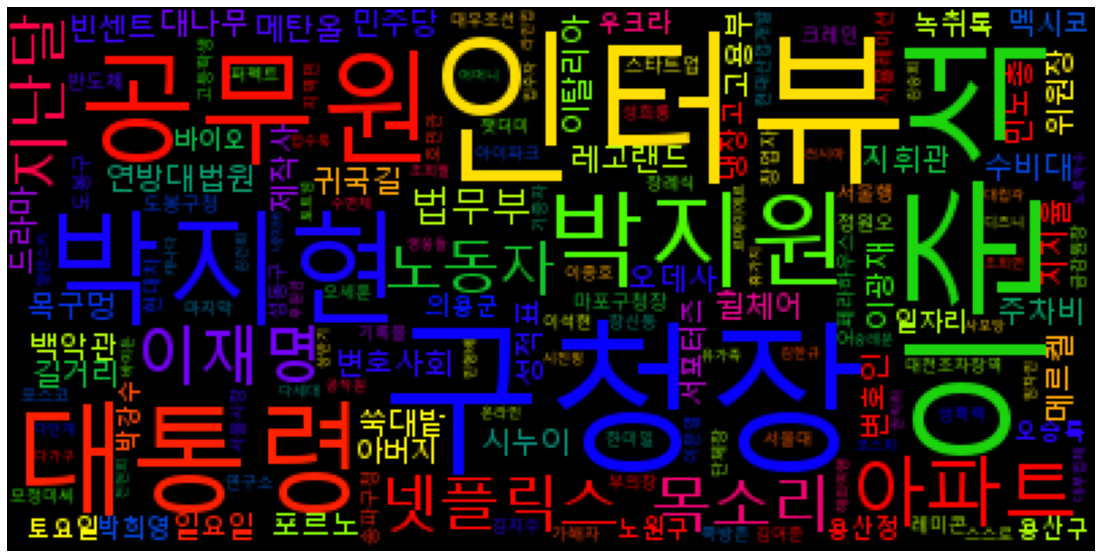

In [42]:
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis('off')

내용 토큰화수 딕셔너리 형태로 구하기

In [43]:
content_vocab = {}
preprocessed_contents = []
for sentence in whole_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in content_vocab:
                content_vocab[word] = 0 
            content_vocab[word] += 1
            preprocessed_contents.append(word) 
print(content_vocab)
print(preprocessed_contents)

{'.픽사베': 1, '대나무': 6, '로스앤젤레스': 1, '자연사': 1, '박물관': 4, '왕샤오밍': 1, '자이언트': 3, '락토스': 2, '윈난성': 1, '손가락': 1, '판다가짜엄지': 1, '뉴시스': 7, '전문가': 12, '현대판': 1, '몸무게': 1, '갈고리': 1, '육식성': 1, '연합뉴스': 20, '변호사회': 3, '이준석': 16, '변호인': 2, '호국단': 1, '변호사': 11, '공동정범': 2, '대한변호사협회': 1, '지난달': 74, '연구소': 11, '녹취록': 3, '확인서': 3, '비대위원장': 5, '민형배': 8, '박지현': 11, '더불어민주당': 25, '위원장': 52, '여의도': 10, '그린벨트': 8, '민주당': 48, '정치인': 6, '이광재': 2, '온라인': 37, '아버지': 12, '페이스북': 12, '사실라소설가지고돈버는유튜버들그렇게많은줄몰랐다': 1, '‘조유나': 1, '일가족': 5, '지지자': 1, '온정주의': 1, '출마자': 3, '이재명': 18, '컷오프': 2, '한동안': 4, '목소리': 15, '강병원': 4, '박용진': 3, '강경파': 4, '처럼회': 1, '오른쪽': 5, '반성문': 1, '독재자': 1, '인터뷰': 13, '포인트': 14, '상임위': 1, '.처럼회': 1, '.대해민': 1, '본회의': 2, '찬성표': 1, '관계자': 39, '이재명리기': 1, '시누이': 4, '서울동작경찰서': 1, '동작구': 1, '메탄올': 2, '레고랜드': 7, '‘주차료': 1, '주차장': 3, '테마파크': 1, '장애인': 5, '스티커': 3, '안전사고': 2, '환경청': 4, '행정부': 4, '발전소': 10, '온실가스': 4, '뉴욕타임스': 3, '바이든': 26, '대통령': 192, '미국연방대법원': 1, '워싱턴': 3, '광범위': 2, '배출량': 1, '로이터': 8, '

In [44]:
content_counter = Counter(preprocessed_contents)
content_counter

Counter({'.픽사베': 1,
         '대나무': 6,
         '로스앤젤레스': 1,
         '자연사': 1,
         '박물관': 4,
         '왕샤오밍': 1,
         '자이언트': 3,
         '락토스': 2,
         '윈난성': 1,
         '손가락': 1,
         '판다가짜엄지': 1,
         '뉴시스': 7,
         '전문가': 12,
         '현대판': 1,
         '몸무게': 1,
         '갈고리': 1,
         '육식성': 1,
         '연합뉴스': 20,
         '변호사회': 3,
         '이준석': 16,
         '변호인': 2,
         '호국단': 1,
         '변호사': 11,
         '공동정범': 2,
         '대한변호사협회': 1,
         '지난달': 74,
         '연구소': 11,
         '녹취록': 3,
         '확인서': 3,
         '비대위원장': 5,
         '민형배': 8,
         '박지현': 11,
         '더불어민주당': 25,
         '위원장': 52,
         '여의도': 10,
         '그린벨트': 8,
         '민주당': 48,
         '정치인': 6,
         '이광재': 2,
         '온라인': 37,
         '아버지': 12,
         '페이스북': 12,
         '사실라소설가지고돈버는유튜버들그렇게많은줄몰랐다': 1,
         '‘조유나': 1,
         '일가족': 5,
         '지지자': 1,
         '온정주의': 1,
         '출마자': 3,
         '이재명': 18,
        

(-0.5, 399.5, 199.5, -0.5)

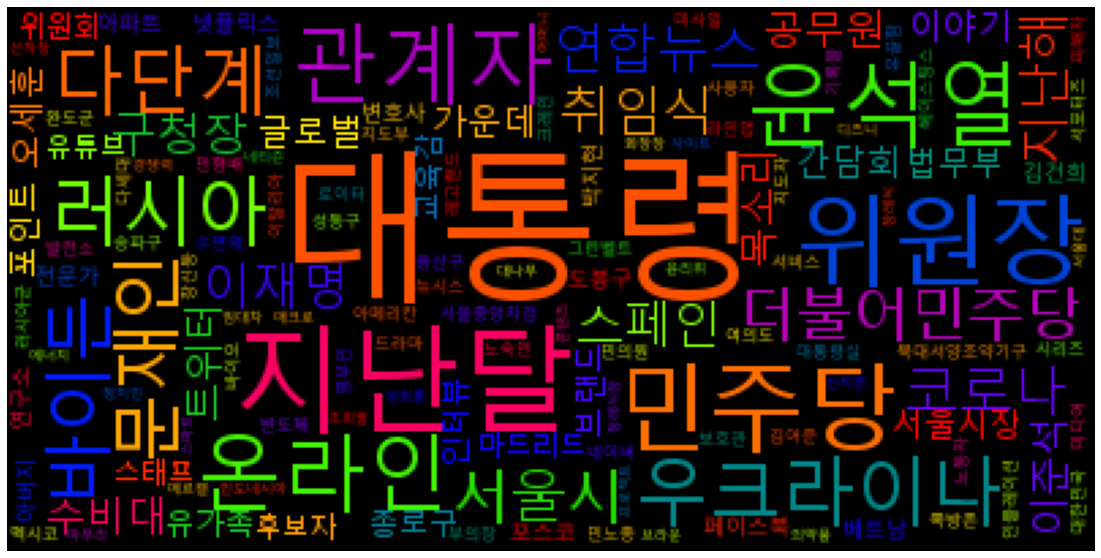

In [45]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis('off')

In [46]:
cos_sim_.to_csv("tfcos_sim.csv", encoding='utf-8-sig')
cos_sim_tfidf_.to_csv("tfidfcos_sim.csv", encoding='utf-8-sig')

## 전체 표본 이용하여서 tf-idf 데이터 유사도 추출하기

### 조선일보의 데이터 유사성 구하기

In [47]:
whole_chosun_title_noun = []
for chosun_title in chosun_eilbo_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_chosun_title_noun.append(noun)

In [53]:
whole_chosun_content_sentence_list = []
count = 1
for chosun_url in chosun_eilbo_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    try:
        response_0 = requests.get(chosun_url, headers=headers)
    except OSError:
        print("OS 연결에서 응답이 되지 않습니다.")
        whole_chosun_content_sentence_list.append("")
    except ProtocolError:
        print("연결이 끊켰습니다.")
        whole_chosun_content_sentence_list.append("")     
    except ConnectionError:
        print("연결이 끊켰습니다.")
        whole_chosun_content_sentence_list.append("")
    else:
        soup_0 = BeautifulSoup(response_0.text, 'html.parser')
        content_0_data = soup_0.find('div', {"id" : "dic_area"})
        try:
            content_0_data = content_0_data.get_text().strip()
        except AttributeError:
            whole_chosun_content_sentence_list.append("")
        else:
            content_0_data = content_0_data.replace('\n','').replace('\t','')
            new_content_0_data = content_0_data.replace(" ", '')
            kospacing_new_content_0_data = spacing(new_content_0_data) 
            words_data = twitter.morphs(kospacing_new_content_0_data)
            with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
                stopwords_list = stopwords.read().split('\n')
            new_content_1 ='' 
            for i in korean_change_no_stop_words(words_data, stopwords_list):
                new_content_1 += i
            tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
            # tokenizer3_content_2 = RegexpTokenizer('')
            # print(tokenizer3_content_1.tokenize(new_content_1))
            regular_expression_sentence = ''
            for expression in tokenizer3_content_1.tokenize(new_content_1):
                regular_expression_sentence += expression
            whole_chosun_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 78ms/step


In [54]:
len(whole_chosun_content_sentence_list)

100

In [56]:
whole_chosun_content_noun = []
count = 1
for content in whole_chosun_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_chosun_content_noun.append(noun)

1/1 [==============================] - 0s 59ms/step


In [57]:
chosun_title_content_vocab = list(set(whole_chosun_title_noun + whole_chosun_content_noun))
chosun_title_content_vocab.sort()

In [71]:
chosun_eilbo_database.columns

Index(['title', 'content', 'url'], dtype='object')

In [72]:
chosun_tail_100_database = pd.DataFrame(chosun_eilbo_database.tail(100).values, columns=chosun_eilbo_database.columns)
chosun_tail_100_database

title  \
0                구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락   
1              진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”   
2   회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대   
3                      제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다   
4                      제주영어교육도시 국제학교 충원율 역대 최고 기록   
..                                            ...   
95                   [선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’   
96           [김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리   
97                        [차현진의 돈과 세상] [94] 말 한마디   
98      [김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑   
99             [수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!   

                                              content  \
0   인플레이션과 경기 침체 우려에 따른 수요 둔화, 광고 매출 감소, 강달러가 미 실리...   
1   김의겸 더불어민주당 의원과 유튜브 채널 ‘시민언론 더탐사’가 제기한 한동훈 법무부 ...   
2   지난 20일(현지시각) 미 캘리포니아 산호세에 있는 시스코 본사 2층 ‘하이브리드 ...   
3   제주삼다수를 생산, 판매하는 제주도개발공사가 친환경 경영의 기준이 되고 있다. 제주...   
4   동북아시아의 글로벌 교육허브로 조성중인 제주영어교육도시 충원율이 역대 최고를 기록했...   
..                                                ...   
95  이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할...   
96  집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기...   
97  말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새...   
98  불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑...   
99  ‘가장 인간적인 유인원’으로 알려진 보노보 동족 포식 현상 잇따라 목격돼 고등동물에...   

                                                  url  
0   https://n.news.naver.com/mnews/article/023/000...  
1   https://n.news.naver.com/mnews/article/023/000...  
2   https://n.news.naver.com/mnews/article/023/000...  
3   https://n.news.naver.com/mnews/article/023/000...  
4   https://n.news.naver.com/mnews/article/023/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/023/000...  
96  https://n.news.naver.com/mnews/article/023/000...  
97  https://n.news.naver.com/mnews/article/023/000...  
98  https://n.news.naver.com/mnews/article/023/000...  
99  https://n.news.naver.com/mnews/article/023/000...  

[100 rows x 3 columns]

In [65]:
len(chosun_eilbo_database["title"])

25844

In [74]:
chosun_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_tail_100_database["title"])):
  chosun_title_tfidf_result.append([])
  try:
    d = chosun_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(chosun_title_content_vocab)):
      chosun_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(chosun_title_content_vocab)):
      t = chosun_title_content_vocab[j]
      chosun_title_tfidf_result[-1].append(tfidf(t, d))

# len(result)
chosun_title_tfidf_ = pd.DataFrame(chosun_title_tfidf_result, columns=chosun_title_content_vocab, index=chosun_tail_100_database["title"])
chosun_title_tfidf_

+오펙  .기아  .년월제  .분채  .수소  .에서  \
title                                                                          
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락               0.0  0.0   0.0  0.0  0.0  0.0   
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”             0.0  0.0   0.0  0.0  0.0  0.0   
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대  0.0  0.0   0.0  0.0  0.0  0.0   
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                     0.0  0.0   0.0  0.0  0.0  0.0   
제주영어교육도시 국제학교 충원율 역대 최고 기록                     0.0  0.0   0.0  0.0  0.0  0.0   
...                                            ...  ...   ...  ...  ...  ...   
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                   0.0  0.0   0.0  0.0  0.0  0.0   
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리           0.0  0.0   0.0  0.0  0.0  0.0   
[차현진의 돈과 세상] [94] 말 한마디                        0.0  0.0   0.0  0.0  0.0  0.0   
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑      0.0  0.0   0.0  0.0  0.0  0.0   
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!             0.0  0.0   0.0  0.0  0.0  0.0   

                                               .왐바  .웅열오  .자율  .지사  ...  후쿠다  \
title                                                               ...        
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락               0.0   0.0  0.0  0.0  ...  0.0   
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”             0.0   0.0  0.0  0.0  ...  0.0   
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대  0.0   0.0  0.0  0.0  ...  0.0   
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                     0.0   0.0  0.0  0.0  ...  0.0   
제주영어교육도시 국제학교 충원율 역대 최고 기록                     0.0   0.0  0.0  0.0  ...  0.0   
...                                            ...   ...  ...  ...  ...  ...   
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                   0.0   0.0  0.0  0.0  ...  0.0   
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리           0.0   0.0  0.0  0.0  ...  0.0   
[차현진의 돈과 세상] [94] 말 한마디                        0.0   0.0  0.0  0.0  ...  0.0   
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑      0.0   0.0  0.0  0.0  ...  0.0   
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!             0.0   0.0  0.0  0.0  ...  0.0   

                                               휠체어  흑석동  흙수저  흥선대원군  희낙락  희생물  \
title                                                                           
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락               0.0  0.0  0.0    0.0  0.0  0.0   
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”             0.0  0.0  0.0    0.0  0.0  0.0   
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대  0.0  0.0  0.0    0.0  0.0  0.0   
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                     0.0  0.0  0.0    0.0  0.0  0.0   
제주영어교육도시 국제학교 충원율 역대 최고 기록                     0.0  0.0  0.0    0.0  0.0  0.0   
...                                            ...  ...  ...    ...  ...  ...   
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                   0.0  0.0  0.0    0.0  0.0  0.0   
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리           0.0  0.0  0.0    0.0  0.0  0.0   
[차현진의 돈과 세상] [94] 말 한마디                        0.0  0.0  0.0    0.0  0.0  0.0   
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑      0.0  0.0  0.0    0.0  0.0  0.0   
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!             0.0  0.0  0.0    0.0  0.0  0.0   

                                               희소성  히데요시  힐스테이트  
title                                                            
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락               0.0   0.0    0.0  
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”             0.0   0.0    0.0  
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대  0.0   0.0    0.0  
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                     0.0   0.0    0.0  
제주영어교육도시 국제학교 충원율 역대 최고 기록                     0.0   0.0    0.0  
...                                            ...   ...    ...  
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                   0.0   0.0    0.0  
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리           0.0   0.0    0.0  
[차현진의 돈과 세상] [94] 말 한마디                        0.0   0.0    0.0  
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑      0.0   0.0    0.0  
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!             0.0   0.0    0.0  

[100 rows x 1746 columns]

In [75]:
chosun_title_tfidf_.to_csv("chosun_tail_100_title_tfidf.csv", encoding='utf-8-sig')

In [76]:
chosun_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_chosun_content_sentence_list)):
  chosun_content_tfidf_result.append([])
  try:
    d = whole_chosun_content_sentence_list[i]
  except KeyError:
    for j in range(len(chosun_title_content_vocab)):
        chosun_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_chosun_content_sentence_list[i]
    for j in range(len(chosun_title_content_vocab)):
      t = chosun_title_content_vocab[j]
      chosun_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
chosun_content_tfidf_ = pd.DataFrame(chosun_content_tfidf_result, columns=chosun_title_content_vocab, index=chosun_tail_100_database["content"])
chosun_content_tfidf_

+오펙  .기아      .년월제  .분채  \
content                                                                       
인플레이션과 경기 침체 우려에 따른 수요 둔화, 광고 매출 감소, 강달러가 미 실리콘...  0.0  0.0  0.000000  0.0   
김의겸 더불어민주당 의원과 유튜브 채널 ‘시민언론 더탐사’가 제기한 한동훈 법무부 장...  0.0  0.0  0.000000  0.0   
지난 20일(현지시각) 미 캘리포니아 산호세에 있는 시스코 본사 2층 ‘하이브리드 워...  0.0  0.0  0.000000  0.0   
제주삼다수를 생산, 판매하는 제주도개발공사가 친환경 경영의 기준이 되고 있다. 제주개...  0.0  0.0  1.386294  0.0   
동북아시아의 글로벌 교육허브로 조성중인 제주영어교육도시 충원율이 역대 최고를 기록했다...  0.0  0.0  0.000000  0.0   
...                                                 ...  ...       ...  ...   
이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할 ...  0.0  0.0  0.000000  0.0   
집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기에...  0.0  0.0  0.000000  0.0   
말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새로...  0.0  0.0  0.000000  0.0   
불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑 ...  0.0  0.0  0.000000  0.0   
‘가장 인간적인 유인원’으로 알려진 보노보 동족 포식 현상 잇따라 목격돼 고등동물에게...  0.0  0.0  0.000000  0.0   

                                                    .수소  .에서       .왐바  .웅열오  \
content                                                                        
인플레이션과 경기 침체 우려에 따른 수요 둔화, 광고 매출 감소, 강달러가 미 실리콘...  0.0  0.0  0.000000   0.0   
김의겸 더불어민주당 의원과 유튜브 채널 ‘시민언론 더탐사’가 제기한 한동훈 법무부 장...  0.0  0.0  0.000000   0.0   
지난 20일(현지시각) 미 캘리포니아 산호세에 있는 시스코 본사 2층 ‘하이브리드 워...  0.0  0.0  0.000000   0.0   
제주삼다수를 생산, 판매하는 제주도개발공사가 친환경 경영의 기준이 되고 있다. 제주개...  0.0  0.0  0.000000   0.0   
동북아시아의 글로벌 교육허브로 조성중인 제주영어교육도시 충원율이 역대 최고를 기록했다...  0.0  0.0  0.000000   0.0   
...                                                 ...  ...       ...   ...   
이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할 ...  0.0  0.0  0.000000   0.0   
집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기에...  0.0  0.0  0.000000   0.0   
말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새로...  0.0  0.0  0.000000   0.0   
불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑 ...  0.0  0.0  0.000000   0.0   
‘가장 인간적인 유인원’으로 알려진 보노보 동족 포식 현상 잇따라 목격돼 고등동물에게...  0.0  0.0  1.386294   0.0   

                                                    .자율  .지사  ...  후쿠다  휠체어  \
content                                                       ...             
인플레이션과 경기 침체 우려에 따른 수요 둔화, 광고 매출 감소, 강달러가 미 실리콘...  0.0  0.0  ...  0.0  0.0   
김의겸 더불어민주당 의원과 유튜브 채널 ‘시민언론 더탐사’가 제기한 한동훈 법무부 장...  0.0  0.0  ...  0.0  0.0   
지난 20일(현지시각) 미 캘리포니아 산호세에 있는 시스코 본사 2층 ‘하이브리드 워...  0.0  0.0  ...  0.0  0.0   
제주삼다수를 생산, 판매하는 제주도개발공사가 친환경 경영의 기준이 되고 있다. 제주개...  0.0  0.0  ...  0.0  0.0   
동북아시아의 글로벌 교육허브로 조성중인 제주영어교육도시 충원율이 역대 최고를 기록했다...  0.0  0.0  ...  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할 ...  0.0  0.0  ...  0.0  0.0   
집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기에...  0.0  0.0  ...  0.0  0.0   
말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새로...  0.0  0.0  ...  0.0  0.0   
불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑 ...  0.0  0.0  ...  0.0  0.0   
‘가장 인간적인 유인원’으로 알려진 보노보 동족 포식 현상 잇따라 목격돼 고등동물에게...  0.0  0.0  ...  0.0  0.0   

                                                    흑석동  흙수저  흥선대원군  희낙락  \
content                                                                    
인플레이션과 경기 침체 우려에 따른 수요 둔화, 광고 매출 감소, 강달러가 미 실리콘...  0.0  0.0    0.0  0.0   
김의겸 더불어민주당 의원과 유튜브 채널 ‘시민언론 더탐사’가 제기한 한동훈 법무부 장...  0.0  0.0    0.0  0.0   
지난 20일(현지시각) 미 캘리포니아 산호세에 있는 시스코 본사 2층 ‘하이브리드 워...  0.0  0.0    0.0  0.0   
제주삼다수를 생산, 판매하는 제주도개발공사가 친환경 경영의 기준이 되고 있다. 제주개...  0.0  0.0    0.0  0.0   
동북아시아의 글로벌 교육허브로 조성중인 제주영어교육도시 충원율이 역대 최고를 기록했다...  0.0  0.0    0.0  0.0   
...                                                 ...  ...    ...  ...   
이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할 ...  0.0  0.0    0.0  0.0   
집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기에...  0.0  0.0    0.0  0.0   
말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새로...  0.0  0.0    0.0  0.0   
불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑 ...  0.0  0.0    0.0  0.0   
‘가장 인간적인 유인원’으로 알려진 보노보 동족 포식 현상 잇따라 목격돼 고등

In [77]:
import numpy as np

In [79]:
chosun_tail_100_cos_sim_tfidf = np.dot(chosun_content_tfidf_.values, chosun_title_tfidf_.values.T)/(np.linalg.norm(chosun_title_tfidf_.values) * np.linalg.norm(chosun_content_tfidf_.values))
chosun_tail_100_cos_sim_tfidf_ =pd.DataFrame(chosun_tail_100_cos_sim_tfidf, columns=chosun_tail_100_database["content"], index = chosun_tail_100_database["title"])

In [80]:
chosun_tail_100_cos_sim_tfidf_

content                                        인플레이션과 경기 침체 우려에 따른 수요 둔화, 광고 매출 감소, 강달러가 미 실리콘밸리 빅테크 실적에도 악영향을 미쳤다. 25 …  \
title                                                                                                                      
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락                                                         0.00115                           
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”                                                       0.00000                           
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대                                            0.00000                           
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                                                               0.00000                           
제주영어교육도시 국제학교 충원율 역대 최고 기록                                                               0.00000                           
...                                                                                          ...                           
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                                                             0.00000                           
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리                                                     0.00000                           
[차현진의 돈과 세상] [94] 말 한마디                                                                  0.00000                           
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑                                                0.00000                           
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!                                                       0.00000                           

content                                        김의겸 더불어민주당 의원과 유튜브 채널 ‘시민언론 더탐사’가 제기한 한동훈 법무부 장관, 윤석열 대통령의 ‘심야 술자리’ 의혹에 …  \
title                                                                                                                      
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락                                                        0.000000                           
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”                                                      0.004599                           
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대                                           0.000000                           
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                                                              0.000000                           
제주영어교육도시 국제학교 충원율 역대 최고 기록                                                              0.000000                           
...                                                                                          ...                           
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                                                            0.000000                           
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리                                                    0.000000                           
[차현진의 돈과 세상] [94] 말 한마디                                                                 0.000000                           
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑                                               0.000000                           
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!                                                      0.000000                           

content                                        지난 20일(현지시각) 미 캘리포니아 산호세에 있는 시스코 본사 2층 ‘하이브리드 워크 익스피리언스 센터’. 오는 11월 고객사 …  \
title                                                                                                                      
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락                                                        0.000000                           
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”                                                      0.000000                           
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대                                           0.009773                           
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                                                              0.000000                           
제주영어교육도시 국제학교 충원율 역대 최고 기록    

In [81]:
chosun_tail_100_cos_sim_tfidf_.to_csv("chosun_tail_100_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [82]:
chosun_whole_title_sentence = []
for chosun_title in chosun_tail_100_database["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    title = ''
    for i in list1:
        title+=i
    chosun_whole_title_sentence.append(title)

In [87]:
chosun_title_vocab = {}
chosun_preprocessed_titles = []
for sentence in chosun_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) >= 2: 
            if word not in chosun_title_vocab:
                chosun_title_vocab[word] = 0 
            chosun_title_vocab[word] += 1
            chosun_preprocessed_titles.append(word)
chosun_title_counter = Counter(chosun_preprocessed_titles)
print(chosun_title_counter)

Counter({'회의': 4, '거래': 3, '에너지': 3, '사진': 3, '국민': 3, '단독': 3, '사설': 3, '중국': 3, '기업': 3, '한반도': 3, '구글': 2, '인플레': 2, '강화': 2, '제주도': 2, '제주': 2, '관광': 2, '시작': 2, '방송': 2, '출연': 2, '대표': 2, '부동산': 2, '정부': 2, '연금': 2, '개혁': 2, '특위': 2, '미래': 2, '생각': 2, '상식': 2, '월세': 2, '서해': 2, '최초': 2, '특허': 2, '연구': 2, '미술': 2, '독자': 2, '위기': 2, '금리': 2, '개월': 2, '경제': 2, '일자': 2, '종목': 2, '환율': 2, '운동': 2, '매출': 2, '분기': 2, '금융': 2, '그룹': 2, '인사': 2, '신문': 2, '선생': 2, '국방': 2, '의장': 2, '별세': 2, '소설': 2, '전쟁': 2, '우정': 2, '대통령': 2, '문제': 2, '카메라': 2, '대구': 2, '국회': 2, '가능': 2, '탈출': 2, '세상': 2, '실적': 1, '달러': 1, '충격': 1, '시간': 1, '폭락': 1, '진중권': 1, '한동훈': 1, '제로': 1, '콜라': 1, '자살': 1, '오디오': 1, '워터마크': 1, '기능': 1, '하이브리드': 1, '개발': 1, '공사': 1, '플라스틱': 1, '프리': 1, '제주영어교육도시': 1, '국제': 1, '학교': 1, '충원': 1, '역대': 1, '최고': 1, '기록': 1, '에어택시': 1, '한라산': 1, '성산': 1, '일출봉': 1, '청정': 1, '그린': 1, '수소': 1, '거점': 1, '도시': 1, '안문숙': 1, '한동안': 1, '이유': 1, '김웅': 1, '이준석': 1, '깜깜이': 1, '정지': 1, '개미': 1, '부실': 

(-0.5, 399.5, 199.5, -0.5)

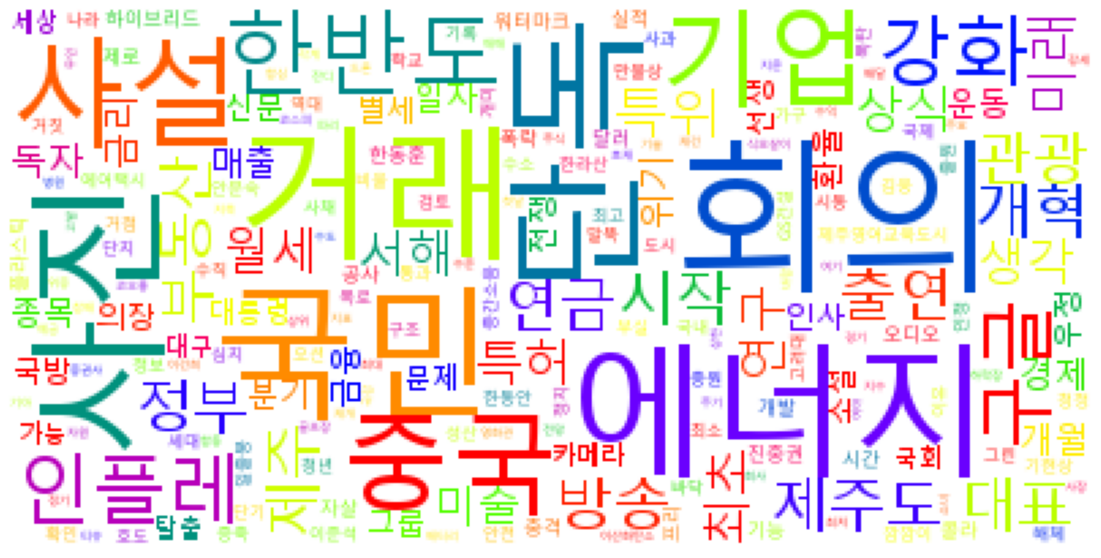

In [88]:
chosun_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(chosun_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(chosun_title_word_cloud)
plt.axis('off')

내용 토큰화수 딕셔너리 형태로 구하기

In [85]:
chosun_content_vocab = {}
chosun_preprocessed_contents = []
for sentence in whole_chosun_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in chosun_content_vocab:
                chosun_content_vocab[word] = 0 
            chosun_content_vocab[word] += 1
            chosun_preprocessed_contents.append(word) 
chosun_content_counter = Counter(chosun_preprocessed_contents)
chosun_content_counter

Counter({'로이터': 3,
         '인플레이션': 8,
         '실리콘': 1,
         '악영향': 1,
         '마이크로소프트': 8,
         '클라우드': 3,
         '알파벳': 2,
         '모회사': 1,
         '순이익': 5,
         '주당순이익': 2,
         '팬데믹': 2,
         '성장세': 2,
         '유튜브': 15,
         '연합뉴스': 7,
         '서비스': 14,
         '라이선스': 1,
         '비즈니스': 3,
         '프로세스': 3,
         '퍼스널': 2,
         '컴퓨팅': 1,
         '경영자': 1,
         '.순다르피': 1,
         '사티나델라': 1,
         '더불어민주당': 16,
         '한동훈': 8,
         '법무부': 10,
         '기자단': 5,
         '윤석열': 11,
         '대통령': 48,
         '술자리': 12,
         '진중권': 1,
         '라디오': 5,
         '경호원': 2,
         '윤도현': 1,
         '첼리스트': 2,
         '이재명': 11,
         '지지자': 1,
         '판타지': 1,
         '필터링': 1,
         '거짓말': 6,
         '청담동': 5,
         '그랜드': 1,
         '피아노': 1,
         '동백아가씨': 2,
         '매체는슈퍼챗장사하': 1,
         '민주당': 35,
         '대변인': 25,
         '김성회': 1,
         '연구소': 9,
         '김앤장': 3,
         '변

(-0.5, 399.5, 199.5, -0.5)

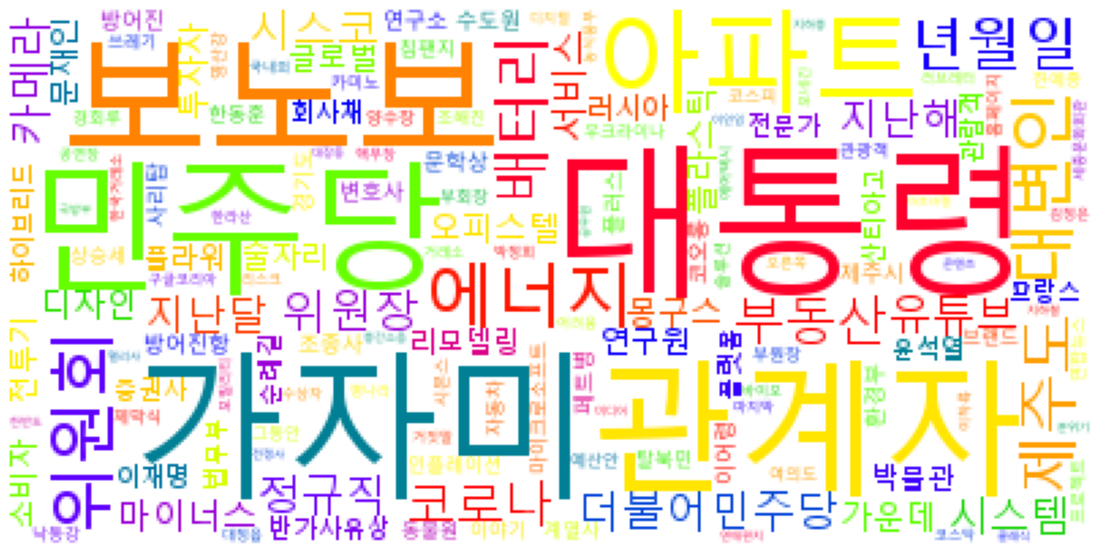

In [86]:
chosun_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(chosun_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(chosun_content_cloud)
plt.axis('off')

### 한국경제의 데이터 유사성 구하기

In [89]:
whole_korean_title_noun = []
for korean_title in korean_economy_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(korean_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 2:
                continue
            else:
                whole_korean_title_noun.append(noun)

In [90]:
whole_korean_content_sentence_list = []
count = 1
for korean_url in korean_economy_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(korean_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_korean_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_korean_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 68ms/step


In [91]:
whole_korean_content_noun = []
count = 1
for content in whole_korean_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_korean_content_noun.append(noun)

1/1 [==============================] - 0s 79ms/step


In [92]:
korean_title_content_vocab = list(set(whole_korean_title_noun + whole_korean_content_noun))
korean_title_content_vocab.sort()

In [94]:
korean_tail_100_database = pd.DataFrame(korean_economy_database.tail(100).values, columns=korean_economy_database.columns)
korean_tail_100_database

title  \
0      코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호   
1    김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"   
2   탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'   
3     농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행   
4               서울 중구, '중구민 한마음 걷기대회' 연다   
..                                   ...   
95    [사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당   
96         [다산칼럼] '기대인플레이션' 정확한 측정이 중요하다   
97               [포토] 라필루스 샨티, '매력적인 미소'   
98               [시론] 북한의 우발적 핵 공격에 대비해야   
99                      [한경에세이] 크리에이터 세상   

                                              content  \
0   코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시...   
1   울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한...   
2   탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계...   
3   농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 ...   
4   서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이...   
..                                                ...   
95  더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 ...   
96  현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불...   
97  그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M...   
98  컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한...   
99  K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 ...   

                                                  url  
0   https://n.news.naver.com/mnews/article/015/000...  
1   https://n.news.naver.com/mnews/article/015/000...  
2   https://n.news.naver.com/mnews/article/015/000...  
3   https://n.news.naver.com/mnews/article/015/000...  
4   https://n.news.naver.com/mnews/article/015/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/015/000...  
96  https://n.news.naver.com/mnews/article/015/000...  
97  https://n.news.naver.com/mnews/article/015/000...  
98  https://n.news.naver.com/mnews/article/015/000...  
99  https://n.news.naver.com/mnews/article/015/000...  

[100 rows x 3 columns]

In [95]:
korean_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(korean_tail_100_database["title"])):
  korean_title_tfidf_result.append([])
  try:
    d = korean_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(korean_title_content_vocab)):
      korean_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(korean_title_content_vocab)):
      t = korean_title_content_vocab[j]
      korean_title_tfidf_result[-1].append(tfidf(t, d))

# len(result)
korean_title_tfidf_ = pd.DataFrame(korean_title_tfidf_result, columns=korean_title_content_vocab, index=korean_tail_100_database["title"])
korean_title_tfidf_

.고개  .교리  .담뱃  .르엘  .비더비  .수소수소  .스캐터랩  \
title                                                                          
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호     0.0  0.0  0.0  0.0   0.0    0.0    0.0   
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"   0.0  0.0  0.0  0.0   0.0    0.0    0.0   
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'  0.0  0.0  0.0  0.0   0.0    0.0    0.0   
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
서울 중구, '중구민 한마음 걷기대회' 연다              0.0  0.0  0.0  0.0   0.0    0.0    0.0   
...                                   ...  ...  ...  ...   ...    ...    ...   
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다         0.0  0.0  0.0  0.0   0.0    0.0    0.0   
[포토] 라필루스 샨티, '매력적인 미소'               0.0  0.0  0.0  0.0   0.0    0.0    0.0   
[시론] 북한의 우발적 핵 공격에 대비해야               0.0  0.0  0.0  0.0   0.0    0.0    0.0   
[한경에세이] 크리에이터 세상                      0.0  0.0  0.0  0.0   0.0    0.0    0.0   

                                      .엔젠  .주가  LG화학  ...   회복  회복세  회의실  회의장  \
title                                                 ...                       
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호     0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"   0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'  0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행    0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
서울 중구, '중구민 한마음 걷기대회' 연다              0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
...                                   ...  ...   ...  ...  ...  ...  ...  ...   
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당    0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다         0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
[포토] 라필루스 샨티, '매력적인 미소'               0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
[시론] 북한의 우발적 핵 공격에 대비해야               0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
[한경에세이] 크리에이터 세상                      0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   

                                       회장  회장직  획기적  휴대폰   흑자  흑자냈월는  
title                                                                 
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호     0.0  0.0  0.0  0.0  0.0    0.0  
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"   0.0  0.0  0.0  0.0  0.0    0.0  
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'  0.0  0.0  0.0  0.0  0.0    0.0  
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행    0.0  0.0  0.0  0.0  0.0    0.0  
서울 중구, '중구민 한마음 걷기대회' 연다              0.0  0.0  0.0  0.0  0.0    0.0  
...                                   ...  ...  ...  ...  ...    ...  
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당    0.0  0.0  0.0  0.0  0.0    0.0  
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다         0.0  0.0  0.0  0.0  0.0    0.0  
[포토] 라필루스 샨티, '매력적인 미소'               0.0  0.0  0.0  0.0  0.0    0.0  
[시론] 북한의 우발적 핵 공격에 대비해야               0.0  0.0  0.0  0.0  0.0    0.0  
[한경에세이] 크리에이터 세상                      0.0  0.0  0.0  0.0  0.0    0.0  

[100 rows x 1530 columns]

In [96]:
korean_title_tfidf_.to_csv("korean_tail_100_title_tfidf.csv", encoding='utf-8-sig')

In [99]:
korean_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_korean_content_sentence_list)):
  korean_content_tfidf_result.append([])
  try:
    d = whole_korean_content_sentence_list[i]
  except KeyError:
    for j in range(len(korean_title_content_vocab)):
        korean_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_korean_content_sentence_list[i]
    for j in range(len(korean_title_content_vocab)):
      t = korean_title_content_vocab[j]
      korean_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
korean_content_tfidf_ = pd.DataFrame(korean_content_tfidf_result, columns=korean_title_content_vocab, index=korean_tail_100_database["content"])
korean_content_tfidf_

.고개       .교리  .담뱃  .르엘  \
content                                                                       
코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 ...  0.0  0.000000  0.0  0.0   
울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 ...  0.0  0.000000  0.0  0.0   
탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약...  0.0  0.000000  0.0  0.0   
농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 방...  0.0  0.000000  0.0  0.0   
서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이 ...  0.0  0.000000  0.0  0.0   
...                                                 ...       ...  ...  ...   
더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 오...  0.0  0.000000  0.0  0.0   
현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불확...  0.0  0.000000  0.0  0.0   
그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M ...  0.0  0.000000  0.0  0.0   
컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한다...  0.0  1.386294  0.0  0.0   
K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 종...  0.0  0.000000  0.0  0.0   

                                                        .비더비  .수소수소  .스캐터랩  \
content                                                                      
코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 ...  0.000000    0.0    0.0   
울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 ...  4.158883    0.0    0.0   
탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약...  0.000000    0.0    0.0   
농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 방...  0.000000    0.0    0.0   
서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이 ...  0.000000    0.0    0.0   
...                                                      ...    ...    ...   
더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 오...  0.000000    0.0    0.0   
현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불확...  0.000000    0.0    0.0   
그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M ...  0.000000    0.0    0.0   
컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한다...  0.000000    0.0    0.0   
K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 종...  0.000000    0.0    0.0   

                                                    .엔젠  .주가  LG화학  ...   회복  \
content                                                             ...        
코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 ...  0.0  0.0   0.0  ...  0.0   
울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 ...  0.0  0.0   0.0  ...  0.0   
탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약...  0.0  0.0   0.0  ...  0.0   
농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 방...  0.0  0.0   0.0  ...  0.0   
서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이 ...  0.0  0.0   0.0  ...  0.0   
...                                                 ...  ...   ...  ...  ...   
더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 오...  0.0  0.0   0.0  ...  0.0   
현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불확...  0.0  0.0   0.0  ...  0.0   
그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M ...  0.0  0.0   0.0  ...  0.0   
컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한다...  0.0  0.0   0.0  ...  0.0   
K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 종...  0.0  0.0   0.0  ...  0.0   

                                                    회복세  회의실       회의장  \
content                                                                  
코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 ...  0.0  0.0  0.000000   
울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 ...  0.0  0.0  0.000000   
탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약...  0.0  0.0  0.000000   
농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 방...  0.0  0.0  0.000000   
서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이 ...  0.0  0.0  0.000000   
...                                                 ...  ...       ...   
더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 오...  0.0  0.0  1.386294   
현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불확...  0.0  0.0  0.000000   
그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M ...  0.0  0.0  0.000000   
컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한다...  0.0  0.0  0.000000   
K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 종...  0.0  0.0  0.000000   

     

In [100]:
korean_cos_sim_tfidf = np.dot(korean_content_tfidf_.values, korean_title_tfidf_.values.T)/(np.linalg.norm(korean_title_tfidf_.values) * np.linalg.norm(korean_content_tfidf_.values))
korean_cos_sim_tfidf_ =pd.DataFrame(korean_cos_sim_tfidf, columns=korean_tail_100_database["content"], index = korean_tail_100_database["title"])
korean_cos_sim_tfidf_

content                               코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 기준 코로나19 확진자가 4만842명 늘어  …  \
title                                                                                                             
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호                                              0.003358                           
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"                                            0.000000                           
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'                                           0.000000                           
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행                                             0.000000                           
서울 중구, '중구민 한마음 걷기대회' 연다                                                       0.000000                           
...                                                                                 ...                           
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당                                             0.000000                           
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다                                                  0.000000                           
[포토] 라필루스 샨티, '매력적인 미소'                                                        0.000000                           
[시론] 북한의 우발적 핵 공격에 대비해야                                                        0.000530                           
[한경에세이] 크리에이터 세상                                                               0.000000                           

content                               울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 고목 뿌리 사이엔 화장품들이 올려져있다. 공 …  \
title                                                                                                             
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호                                              0.000353                           
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"                                            0.009190                           
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'                                           0.000177                           
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행                                             0.000000                           
서울 중구, '중구민 한마음 걷기대회' 연다                                                       0.000707                           
...                                                                                 ...                           
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당                                             0.000530                           
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다                                                  0.000530                           
[포토] 라필루스 샨티, '매력적인 미소'                                                        0.000000                           
[시론] 북한의 우발적 핵 공격에 대비해야                                                        0.001237                           
[한경에세이] 크리에이터 세상                                                               0.000177                           

content                               탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약을 체결했다는 소식에 급등하고 있다. 26일 …  \
title                                                                                                             
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호                                              0.000000                           
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"                                            0.000000                           
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'                                           0.003004                           
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행                                             0.000000                           
서울 중구, '중구민 한마음 걷기대회' 연다                                                       0.000000                           
...                                                                                 ...                           
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당                                             0.000000 

In [101]:
korean_cos_sim_tfidf_.to_csv("korean_tail_100_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [102]:
korean_whole_title_sentence = []
for korean_title in korean_tail_100_database["title"]:
    kospacing_title_list = []
    list1 = str(korean_title).split('.')
    title = ''
    for i in list1:
        title+=i
    korean_whole_title_sentence.append(title)

In [105]:
korean_title_vocab = {}
korean_preprocessed_titles = []
for sentence in korean_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) >= 2: 
            if word not in korean_title_vocab:
                korean_title_vocab[word] = 0 
            korean_title_vocab[word] += 1
            korean_preprocessed_titles.append(word)
korean_title_counter = Counter(korean_preprocessed_titles)
# print(korean_title_counter)

(-0.5, 399.5, 199.5, -0.5)

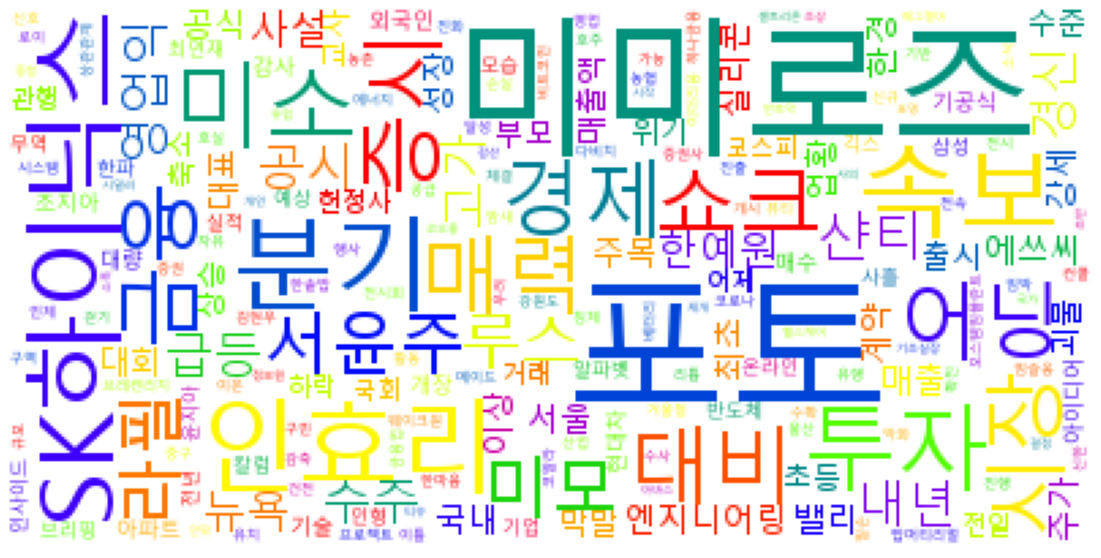

In [106]:
korean_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(korean_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(korean_title_word_cloud)
plt.axis('off')

In [107]:
korean_content_vocab = {}
korean_preprocessed_contents = []
for sentence in whole_korean_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in korean_content_vocab:
                korean_content_vocab[word] = 0 
            korean_content_vocab[word] += 1
            korean_preprocessed_contents.append(word) 
korean_content_counter = Counter(korean_preprocessed_contents)
korean_content_counter

Counter({'일주일': 1,
         '용산구': 1,
         '보건소': 1,
         '진료소': 1,
         '연합뉴스': 15,
         '코로나': 10,
         '확진자': 6,
         '겨울철': 1,
         '강원명': 1,
         '사망자': 1,
         '동대문': 2,
         '비더비': 2,
         '운동복': 1,
         '브랜드': 21,
         '화장품': 3,
         '증강현실': 1,
         '헤어스타일': 1,
         '스마트': 3,
         '동대문디자인플라자': 1,
         '.비더비': 3,
         '김현우': 1,
         '진흥원': 1,
         '한국경제신문': 4,
         '인터뷰': 3,
         '소비자': 17,
         '중소기업': 7,
         '스타트업': 23,
         '지난달': 10,
         '바이오': 13,
         '필리아': 1,
         '나뭇잎': 1,
         '.세대': 1,
         '플랫폼': 40,
         '브랜디': 1,
         '그동안': 5,
         '성수동': 1,
         '스토어': 2,
         '"비더비': 1,
         '온라인': 9,
         '스타일': 1,
         '미러로이드': 1,
         '전성기': 1,
         '밀라노': 1,
         '경쟁력': 5,
         '종사자': 1,
         '부자재': 1,
         '정부관': 1,
         '클러스터': 1,
         '파급력': 1,
         '본거지': 1,
         '가로수': 1,
   

(-0.5, 399.5, 199.5, -0.5)

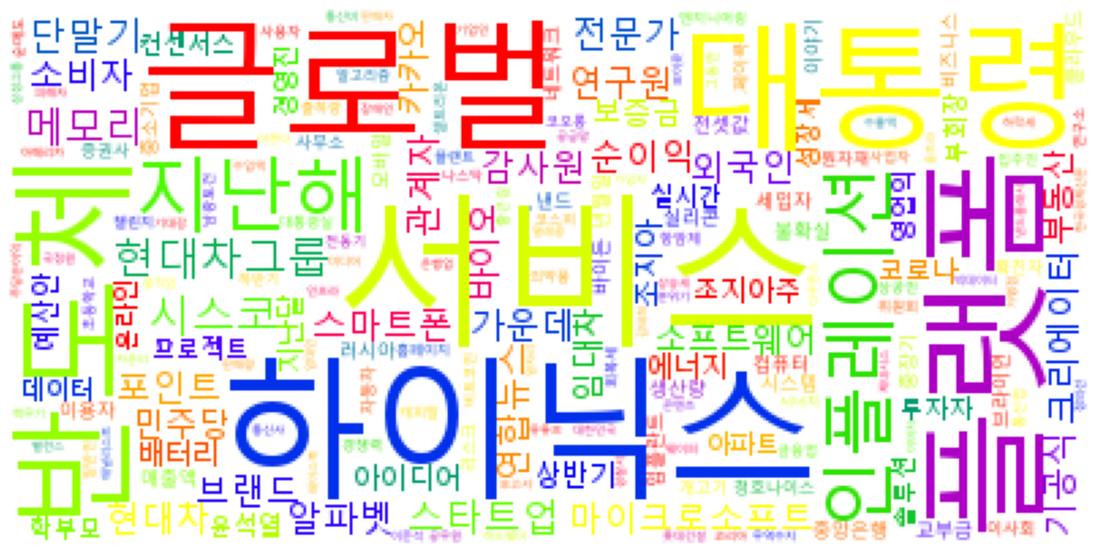

In [108]:
korean_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(korean_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(korean_content_cloud)
plt.axis('off')

### 매일경제 데이터 유사성 구하기

In [109]:
whole_mail_title_noun = []
for mail_title in mail_economy_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(mail_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_mail_title_noun.append(noun)

In [110]:
whole_mail_content_sentence_list = []
count = 1
for mail_url in mail_economy_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(mail_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    try:
        content_0_data = content_0_data.get_text().strip()
    except AttributeError:
        whole_mail_content_sentence_list.append("")
    else:
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_mail_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 47ms/step


In [111]:
whole_mail_content_noun = []
count = 1
for content in whole_mail_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_mail_content_noun.append(noun)

1/1 [==============================] - 0s 64ms/step


In [112]:
mail_title_content_vocab = list(set(whole_mail_title_noun + whole_mail_content_noun))
mail_title_content_vocab.sort()

In [116]:
mail_tail_100_database = pd.DataFrame(mail_economy_database.tail(100).values, columns=mail_economy_database.columns)
mail_tail_100_database

title  \
0        '두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개   
1             尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나   
2        '이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"   
3   "꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]   
4              직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행   
..                                         ...   
95      [사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야   
96        대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]   
97     [사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색   
98              [오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠   
99                 [오늘의 MBN] 산에서 경마 중독 이겨낸 자연인   

                                              content  \
0   하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선...   
1   27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운...   
2   ‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설...   
3   세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세...   
4   3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한...   
..                                                ...   
95  윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환...   
96  더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 ...   
97  시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에...   
98  ■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가...   
99  ■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연...   

                                                  url  
0   https://n.news.naver.com/mnews/article/009/000...  
1   https://n.news.naver.com/mnews/article/009/000...  
2   https://n.news.naver.com/mnews/article/009/000...  
3   https://n.news.naver.com/mnews/article/009/000...  
4   https://n.news.naver.com/mnews/article/009/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/009/000...  
96  https://n.news.naver.com/mnews/article/009/000...  
97  https://n.news.naver.com/mnews/article/009/000...  
98  https://n.news.naver.com/mnews/article/009/000...  
99  https://n.news.naver.com/mnews/article/009/000...  

[100 rows x 3 columns]

In [119]:
mail_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(mail_tail_100_database["title"])):
  mail_title_tfidf_result.append([])
  try:
    d = mail_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(mail_title_content_vocab)):
      mail_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(mail_title_content_vocab)):
      t = mail_title_content_vocab[j]
      mail_title_tfidf_result[-1].append(tfidf(t, d))

# len(result)
mail_title_tfidf_ = pd.DataFrame(mail_title_tfidf_result, columns=mail_title_content_vocab, index=mail_tail_100_database["title"])
mail_title_tfidf_

"디파이  "비트코  '베이  .기후  .달러  .댄블  \
title                                                                        
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개        0.0   0.0  0.0  0.0  0.0  0.0   
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나             0.0   0.0  0.0  0.0  0.0  0.0   
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"        0.0   0.0  0.0  0.0  0.0  0.0   
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]   0.0   0.0  0.0  0.0  0.0  0.0   
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행              0.0   0.0  0.0  0.0  0.0  0.0   
...                                          ...   ...  ...  ...  ...  ...   
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야       0.0   0.0  0.0  0.0  0.0  0.0   
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]         0.0   0.0  0.0  0.0  0.0  0.0   
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색      0.0   0.0  0.0  0.0  0.0  0.0   
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠               0.0   0.0  0.0  0.0  0.0  0.0   
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                  0.0   0.0  0.0  0.0  0.0  0.0   

                                            .보드  .수소  .우준호  .채비  ...  횡단보도  \
title                                                            ...         
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개       0.0  0.0   0.0  0.0  ...   0.0   
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나            0.0  0.0   0.0  0.0  ...   0.0   
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"       0.0  0.0   0.0  0.0  ...   0.0   
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]  0.0  0.0   0.0  0.0  ...   0.0   
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행             0.0  0.0   0.0  0.0  ...   0.0   
...                                         ...  ...   ...  ...  ...   ...   
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야      0.0  0.0   0.0  0.0  ...   0.0   
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]        0.0  0.0   0.0  0.0  ...   0.0   
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색     0.0  0.0   0.0  0.0  ...   0.0   
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠              0.0  0.0   0.0  0.0  ...   0.0   
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                 0.0  0.0   0.0  0.0  ...   0.0   

                                            후강퉁  후보지  후안무치  후원금  후폭풍  휴대폰  \
title                                                                       
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개       0.0  0.0   0.0  0.0  0.0  0.0   
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나            0.0  0.0   0.0  0.0  0.0  0.0   
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"       0.0  0.0   0.0  0.0  0.0  0.0   
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]  0.0  0.0   0.0  0.0  0.0  0.0   
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행             0.0  0.0   0.0  0.0  0.0  0.0   
...                                         ...  ...   ...  ...  ...  ...   
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야      0.0  0.0   0.0  0.0  0.0  0.0   
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]        0.0  0.0   0.0  0.0  0.0  0.0   
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색     0.0  0.0   0.0  0.0  0.0  0.0   
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠              0.0  0.0   0.0  0.0  0.0  0.0   
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                 0.0  0.0   0.0  0.0  0.0  0.0   

                                            희소성  힌두교  힌두교도  
title                                                       
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개       0.0  0.0   0.0  
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나            0.0  0.0   0.0  
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"       0.0  0.0   0.0  
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]  0.0  0.0   0.0  
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행             0.0  0.0   0.0  
...                                         ...  ...   ...  
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야      0.0  0.0   0.0  
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]        0.0  0.0   0.0  
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색     0.0  0.0   0.0  
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠              0.0  0.0   0.0  
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                 0.0  0.0   0.0  

[100 rows x 1475 columns]

In [120]:
mail_title_tfidf_.to_csv("mail_tail_100_title_tfidf.csv", encoding='utf-8-sig')

In [121]:
mail_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_mail_content_sentence_list)):
  mail_content_tfidf_result.append([])
  try:
    d = whole_mail_content_sentence_list[i]
  except KeyError:
    for j in range(len(mail_title_content_vocab)):
        mail_content_tfidf_result[-1].append(0)
  else:
    for j in range(len(mail_title_content_vocab)):
      t = mail_title_content_vocab[j]
      mail_content_tfidf_result[-1].append(tfidf(t, d))

# len(result)
mail_content_tfidf_ = pd.DataFrame(mail_content_tfidf_result, columns=mail_title_content_vocab, index=mail_tail_100_database["content"])
mail_content_tfidf_

"디파이  "비트코  '베이  .기후  .달러  \
content                                                                         
하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다...   0.0   0.0  0.0  0.0  0.0   
27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 ...   0.0   0.0  0.0  0.0  0.0   
‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위...   0.0   0.0  0.0  0.0  0.0   
세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세돌...   0.0   0.0  0.0  0.0  0.0   
3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한 ...   0.0   0.0  0.0  0.0  0.0   
...                                                  ...   ...  ...  ...  ...   
윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환점...   0.0   0.0  0.0  0.0  0.0   
더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 대...   0.0   0.0  0.0  0.0  0.0   
시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에 ...   0.0   0.0  0.0  0.0  0.0   
■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가수...   0.0   0.0  0.0  0.0  0.0   
■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연인...   0.0   0.0  0.0  0.0  0.0   

                                                         .댄블  .보드  .수소  .우준호  \
content                                                                        
하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다...  0.000000  0.0  0.0   0.0   
27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 ...  0.000000  0.0  0.0   0.0   
‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위...  0.000000  0.0  0.0   0.0   
세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세돌...  0.000000  0.0  0.0   0.0   
3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한 ...  4.158883  0.0  0.0   0.0   
...                                                      ...  ...  ...   ...   
윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환점...  0.000000  0.0  0.0   0.0   
더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 대...  0.000000  0.0  0.0   0.0   
시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에 ...  0.000000  0.0  0.0   0.0   
■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가수...  0.000000  0.0  0.0   0.0   
■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연인...  0.000000  0.0  0.0   0.0   

                                                    .채비  ...  횡단보도  후강퉁  후보지  \
content                                                  ...                   
하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다...  0.0  ...   0.0  0.0  0.0   
27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 ...  0.0  ...   0.0  0.0  0.0   
‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위...  0.0  ...   0.0  0.0  0.0   
세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세돌...  0.0  ...   0.0  0.0  0.0   
3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한 ...  0.0  ...   0.0  0.0  0.0   
...                                                 ...  ...   ...  ...  ...   
윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환점...  0.0  ...   0.0  0.0  0.0   
더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 대...  0.0  ...   0.0  0.0  0.0   
시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에 ...  0.0  ...   0.0  0.0  0.0   
■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가수...  0.0  ...   0.0  0.0  0.0   
■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연인...  0.0  ...   0.0  0.0  0.0   

                                                    후안무치  후원금  후폭풍  휴대폰  희소성  \
content                                                                        
하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다...   0.0  0.0  0.0  0.0  0.0   
27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 ...   0.0  0.0  0.0  0.0  0.0   
‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위...   0.0  0.0  0.0  0.0  0.0   
세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세돌...   0.0  0.0  0.0  0.0  0.0   
3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한 ...   0.0  0.0  0.0  0.0  0.0   
...                                                  ...  ...  ...  ...  ...   
윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환점...   0.0  0.0  0.0  0.0  0.0   
더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 대...   0.0  0.0  0.0  0.0  0.0   
시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에 ...   0.0  0.0  0.0  0.0  0.0   
■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영

In [123]:
mail_cos_sim_tfidf = np.dot(mail_content_tfidf_.values, mail_title_tfidf_.values.T)/(np.linalg.norm(mail_title_tfidf_.values) * np.linalg.norm(mail_content_tfidf_.values))
mail_cos_sim_tfidf_ =pd.DataFrame(mail_cos_sim_tfidf, columns=mail_tail_100_database["content"], index = mail_tail_100_database["title"])
mail_cos_sim_tfidf_

content                                     하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다. 티빙 오리지널 '두발로 티켓팅'은 코로나 …  \
title                                                                                                                   
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개                                                     0.0                           
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나                                                          0.0                           
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"                                                     0.0                           
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]                                                0.0                           
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행                                                           0.0                           
...                                                                                       ...                           
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야                                                    0.0                           
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]                                                      0.0                           
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색                                                   0.0                           
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠                                                            0.0                           
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                                                               0.0                           

content                                     27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 경제상황에, 좀처럼 윤 대통령 지지율이 반등 …  \
title                                                                                                                   
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개                                                0.000000                           
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나                                                     0.004825                           
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"                                                0.000000                           
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]                                           0.000000                           
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행                                                      0.000000                           
...                                                                                       ...                           
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야                                               0.001072                           
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]                                                 0.003217                           
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색                                              0.000000                           
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠                                                       0.000000                           
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                                                          0.000000                           

content                                     ‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위원 구자철이 본격적으로 출마를 선언했다. K …  \
title                                                                                                                   
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개                                                     0.0                           
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나                                                          0.0                           
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"                                                     0.0                           
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]                                                0.0                           
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행                                                           0.0                           
...  

In [125]:
mail_cos_sim_tfidf_.to_csv("mail_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [126]:
mail_whole_title_sentence = []
for mail_title in mail_economy_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(mail_title).split('.')
    title = ''
    for i in list1:
        title+=i
    mail_whole_title_sentence.append(title)

In [127]:
mail_title_vocab = {}
mail_preprocessed_titles = []
for sentence in mail_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) >= 2: 
            if word not in mail_title_vocab:
                mail_title_vocab[word] = 0 
            mail_title_vocab[word] += 1
            mail_preprocessed_titles.append(word)
mail_title_counter = Counter(mail_preprocessed_titles)
# print(mail_title_counter)

(-0.5, 399.5, 199.5, -0.5)

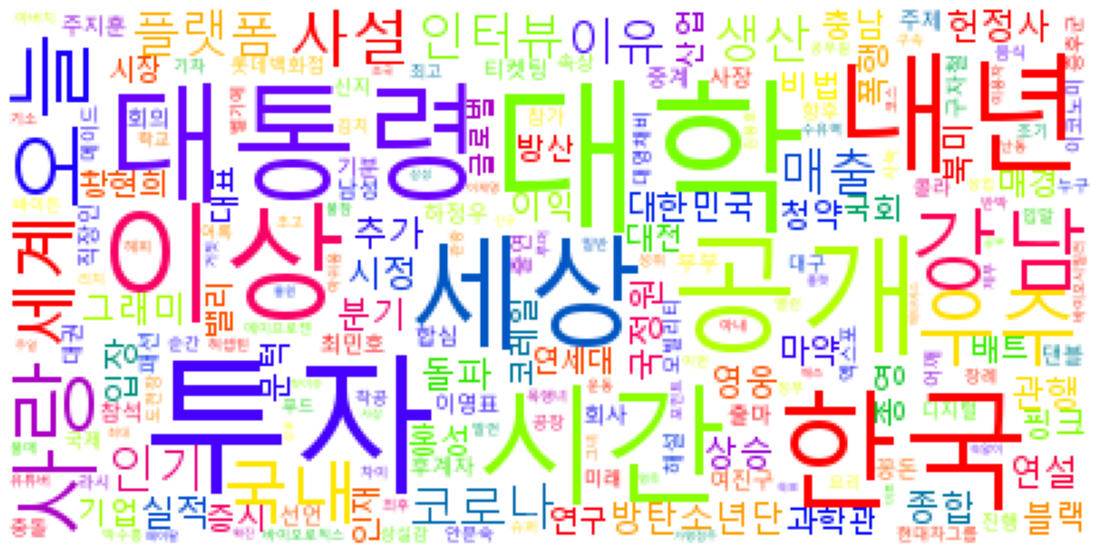

In [128]:
mail_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(mail_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(mail_title_word_cloud)
plt.axis('off')

In [129]:
mail_content_vocab = {}
mail_preprocessed_contents = []
for sentence in whole_mail_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in mail_content_vocab:
                mail_content_vocab[word] = 0 
            mail_content_vocab[word] += 1
            mail_preprocessed_contents.append(word) 
mail_content_counter = Counter(mail_preprocessed_contents)
mail_content_counter

Counter({'윤석열': 23,
         '대통령': 85,
         '대통령실': 8,
         '회의실': 3,
         '이승환': 3,
         '대내외': 3,
         '수석실': 1,
         '그동안': 5,
         '디지털': 28,
         '돌파구': 1,
         '최상목': 1,
         '전문가': 15,
         '당사자': 1,
         '박근혜': 1,
         '이야기': 7,
         '도이나': 1,
         '리스크': 7,
         '관계자': 18,
         '서비스': 96,
         '알파고': 1,
         '이세돌': 1,
         '위기감': 1,
         '스트레스': 2,
         '세무사': 17,
         '기술력': 14,
         '사업자': 12,
         '세무법인혜움이재희': 1,
         '스토리': 1,
         '현대카드': 1,
         '기업가': 1,
         '스타트업': 9,
         '입소문': 1,
         '.미처내': 1,
         '상공인': 5,
         '강남구': 5,
         '역삼동': 3,
         '사무실': 2,
         '카카오톡': 2,
         '젊은이': 1,
         '만족도': 2,
         '사업장': 2,
         '담당자': 1,
         '.혜움세무': 1,
         '택스테크': 1,
         '마찬가지': 4,
         '조력자': 1,
         '대시보드': 1,
         '지원금': 1,
         '시스템': 34,
         '.혜움': 1,
         '케이스': 1,
    

(-0.5, 399.5, 199.5, -0.5)

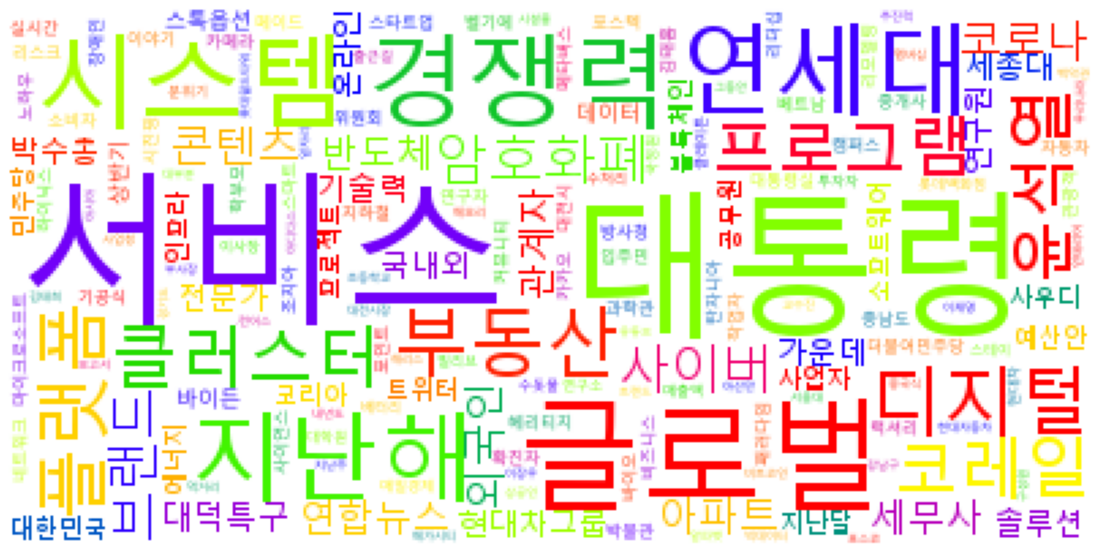

In [130]:
mail_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(mail_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(mail_content_cloud)
plt.axis('off')

### 중앙일보의 데이터 유사성 구하기

In [131]:
whole_middle_title_noun = []
for middle_title in midlle_eilbo_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(middle_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_middle_title_noun.append(noun)

In [132]:
whole_middle_content_sentence_list = []
count = 1
for middle_url in midlle_eilbo_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(middle_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_middle_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_middle_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 94ms/step


In [133]:
whole_middle_content_noun = []
count = 1
for content in whole_middle_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_middle_content_noun.append(noun)

1/1 [==============================] - 0s 81ms/step


In [134]:
middle_title_content_vocab = list(set(whole_middle_title_noun + whole_middle_content_noun))
middle_title_content_vocab.sort()

In [135]:
middle_tail_100_database = pd.DataFrame(midlle_eilbo_database.tail(100).values, columns=midlle_eilbo_database.columns)
middle_tail_100_database

title  \
0   제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]   
1             광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사   
2      이재명 때렸던 박지현 "李퇴진론 반대, 대신 전략·전술 바꿔야"   
3          SK하이닉스 3분기 '어닝쇼크'…영업이익 60.3% 급감   
4         수유역 흡연 단속 공무원 폭행…차 막고 난동부린 여성 최후   
..                                     ...   
95       감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”   
96      홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험   
97     국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다   
98    상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”   
99   여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”   

                                              content  \
0   사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는...   
1   경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다....   
2   박지현 전 더불어민주당 공동비대위원장이 당내 일각에서 제기한 ‘이재명 퇴진론’에 대...   
3   SK하이닉스가 올해 3분기 '어닝쇼크'(실적 충격)를 기록했다. SK하이닉스는 연결...   
4   금연구역 흡연을 단속하던 고령의 공무원을 폭행한 혐의로 경찰 수사를 받던 중 또다시...   
..                                                ...   
95  감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하...   
96  40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍...   
97  이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남...   
98  최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대...   
99  국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 ...   

                                                  url  
0   https://n.news.naver.com/mnews/article/025/000...  
1   https://n.news.naver.com/mnews/article/025/000...  
2   https://n.news.naver.com/mnews/article/025/000...  
3   https://n.news.naver.com/mnews/article/025/000...  
4   https://n.news.naver.com/mnews/article/025/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/025/000...  
96  https://n.news.naver.com/mnews/article/025/000...  
97  https://n.news.naver.com/mnews/article/025/000...  
98  https://n.news.naver.com/mnews/article/025/000...  
99  https://n.news.naver.com/mnews/article/025/000...  

[100 rows x 3 columns]

In [139]:
middle_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(middle_tail_100_database["title"])):
  middle_title_tfidf_result.append([])
  try:
    d = middle_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(middle_title_content_vocab)):
      middle_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(middle_title_content_vocab)):
      t = middle_title_content_vocab[j]
      try:
        middle_title_tfidf_result[-1].append(tfidf(t, d))
      except AttributeError:
        middle_title_tfidf_result[-1].append(0)
# len(result)
middle_title_tfidf_ = pd.DataFrame(middle_title_tfidf_result, columns=middle_title_content_vocab, index=middle_tail_100_database["title"])
middle_title_tfidf_

'씨기소  .거리  .까지  .나토식  .로고와  .수소  .수평  \
title                                                                          
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사             0.0  0.0  0.0   0.0   0.0  0.0  0.0   
이재명 때렸던 박지현 "李퇴진론 반대, 대신 전략·전술 바꿔야"      0.0  0.0  0.0   0.0   0.0  0.0  0.0   
SK하이닉스 3분기 '어닝쇼크'…영업이익 60.3% 급감          0.0  0.0  0.0   0.0   0.0  0.0  0.0   
수유역 흡연 단속 공무원 폭행…차 막고 난동부린 여성 최후         0.0  0.0  0.0   0.0   0.0  0.0  0.0   
...                                      ...  ...  ...   ...   ...  ...  ...   
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”        0.0  0.0  0.0   0.0   0.0  0.0  0.0   
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험       0.0  0.0  0.0   0.0   0.0  0.0  0.0   
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다      0.0  0.0  0.0   0.0   0.0  0.0  0.0   
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”     0.0  0.0  0.0   0.0   0.0  0.0  0.0   
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”    0.0  0.0  0.0   0.0   0.0  0.0  0.0   

                                        .에서  .외설  .회수  ...  후유증  후임자  후진타오  \
title                                                  ...                   
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]  0.0  0.0  0.0  ...  0.0  0.0   0.0   
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사            0.0  0.0  0.0  ...  0.0  0.0   0.0   
이재명 때렸던 박지현 "李퇴진론 반대, 대신 전략·전술 바꿔야"     0.0  0.0  0.0  ...  0.0  0.0   0.0   
SK하이닉스 3분기 '어닝쇼크'…영업이익 60.3% 급감         0.0  0.0  0.0  ...  0.0  0.0   0.0   
수유역 흡연 단속 공무원 폭행…차 막고 난동부린 여성 최후        0.0  0.0  0.0  ...  0.0  0.0   0.0   
...                                     ...  ...  ...  ...  ...  ...   ...   
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”       0.0  0.0  0.0  ...  0.0  0.0   0.0   
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험      0.0  0.0  0.0  ...  0.0  0.0   0.0   
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다     0.0  0.0  0.0  ...  0.0  0.0   0.0   
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”    0.0  0.0  0.0  ...  0.0  0.0   0.0   
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”   0.0  0.0  0.0  ...  0.0  0.0   0.0   

                                        훈련사  휴게실  휴대폰  흥분기  희생자  히잡노이  힌두교도  
title                                                                        
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]  0.0  0.0  0.0  0.0  0.0   0.0   0.0  
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사            0.0  0.0  0.0  0.0  0.0   0.0   0.0  
이재명 때렸던 박지현 "李퇴진론 반대, 대신 전략·전술 바꿔야"     0.0  0.0  0.0  0.0  0.0   0.0   0.0  
SK하이닉스 3분기 '어닝쇼크'…영업이익 60.3% 급감         0.0  0.0  0.0  0.0  0.0   0.0   0.0  
수유역 흡연 단속 공무원 폭행…차 막고 난동부린 여성 최후        0.0  0.0  0.0  0.0  0.0   0.0   0.0  
...                                     ...  ...  ...  ...  ...   ...   ...  
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”       0.0  0.0  0.0  0.0  0.0   0.0   0.0  
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험      0.0  0.0  0.0  0.0  0.0   0.0   0.0  
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다     0.0  0.0  0.0  0.0  0.0   0.0   0.0  
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”    0.0  0.0  0.0  0.0  0.0   0.0   0.0  
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”   0.0  0.0  0.0  0.0  0.0   0.0   0.0  

[100 rows x 1964 columns]

In [140]:
middle_title_tfidf_.to_csv("middle_title_tfidf.csv", encoding='utf-8-sig')

In [141]:
middle_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_middle_content_sentence_list)):
  middle_content_tfidf_result.append([])
  try:
    d = whole_middle_content_sentence_list[i]
  except KeyError:
    for j in range(len(middle_title_content_vocab)):
        middle_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_middle_content_sentence_list[i]
    for j in range(len(middle_title_content_vocab)):
      t = middle_title_content_vocab[j]
      middle_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
middle_content_tfidf_ = pd.DataFrame(middle_content_tfidf_result, columns=middle_title_content_vocab, index=middle_tail_100_database["content"])
middle_content_tfidf_

'씨기소  .거리  .까지  .나토식  \
content                                                                    
사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 ...   0.0  0.0  0.0   0.0   
경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. ...   0.0  0.0  0.0   0.0   
박지현 전 더불어민주당 공동비대위원장이 당내 일각에서 제기한 ‘이재명 퇴진론’에 대해...   0.0  0.0  0.0   0.0   
SK하이닉스가 올해 3분기 '어닝쇼크'(실적 충격)를 기록했다. SK하이닉스는 연결 ...   0.0  0.0  0.0   0.0   
금연구역 흡연을 단속하던 고령의 공무원을 폭행한 혐의로 경찰 수사를 받던 중 또다시 ...   0.0  0.0  0.0   0.0   
...                                                  ...  ...  ...   ...   
감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하면...   0.0  0.0  0.0   0.0   
40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍콩...   0.0  0.0  0.0   0.0   
이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남긴...   0.0  0.0  0.0   0.0   
최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대표...   0.0  0.0  0.0   0.0   
국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 불...   0.0  0.0  0.0   0.0   

                                                    .로고와  .수소  .수평       .에서  \
content                                                                        
사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 ...   0.0  0.0  0.0  1.386294   
경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. ...   0.0  0.0  0.0  0.000000   
박지현 전 더불어민주당 공동비대위원장이 당내 일각에서 제기한 ‘이재명 퇴진론’에 대해...   0.0  0.0  0.0  0.000000   
SK하이닉스가 올해 3분기 '어닝쇼크'(실적 충격)를 기록했다. SK하이닉스는 연결 ...   0.0  0.0  0.0  0.000000   
금연구역 흡연을 단속하던 고령의 공무원을 폭행한 혐의로 경찰 수사를 받던 중 또다시 ...   0.0  0.0  0.0  0.000000   
...                                                  ...  ...  ...       ...   
감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하면...   0.0  0.0  0.0  0.000000   
40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍콩...   0.0  0.0  0.0  0.000000   
이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남긴...   0.0  0.0  0.0  0.000000   
최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대표...   0.0  0.0  0.0  0.000000   
국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 불...   0.0  0.0  0.0  0.000000   

                                                    .외설  .회수  ...  후유증  후임자  \
content                                                       ...             
사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 ...  0.0  0.0  ...  0.0  0.0   
경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. ...  0.0  0.0  ...  0.0  0.0   
박지현 전 더불어민주당 공동비대위원장이 당내 일각에서 제기한 ‘이재명 퇴진론’에 대해...  0.0  0.0  ...  0.0  0.0   
SK하이닉스가 올해 3분기 '어닝쇼크'(실적 충격)를 기록했다. SK하이닉스는 연결 ...  0.0  0.0  ...  0.0  0.0   
금연구역 흡연을 단속하던 고령의 공무원을 폭행한 혐의로 경찰 수사를 받던 중 또다시 ...  0.0  0.0  ...  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하면...  0.0  0.0  ...  0.0  0.0   
40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍콩...  0.0  0.0  ...  0.0  0.0   
이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남긴...  0.0  0.0  ...  0.0  0.0   
최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대표...  0.0  0.0  ...  0.0  0.0   
국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 불...  0.0  0.0  ...  0.0  0.0   

                                                    후진타오  훈련사  휴게실  휴대폰  흥분기  \
content                                                                        
사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 ...   0.0  0.0  0.0  0.0  0.0   
경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. ...   0.0  0.0  0.0  0.0  0.0   
박지현 전 더불어민주당 공동비대위원장이 당내 일각에서 제기한 ‘이재명 퇴진론’에 대해...   0.0  0.0  0.0  0.0  0.0   
SK하이닉스가 올해 3분기 '어닝쇼크'(실적 충격)를 기록했다. SK하이닉스는 연결 ...   0.0  0.0  0.0  0.0  0.0   
금연구역 흡연을 단속하던 고령의 공무원을 폭행한 혐의로 경찰 수사를 받던 중 또다시 ...   0.0  0.0  0.0  0.0  0.0   
...                                                  ...  ...  ...  ...  ...   
감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하면...   0.0  0.0  0.0  0.0  0.0   
40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍콩...   0.0  0.0  0.0  0.0  0.0   
이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남긴...   0.0  0.0  0.0  0.0  0.0   
최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대표...   0.0  0.0  0.0  0.0  0.0   
국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정

In [142]:
middle_cos_sim_tfidf = np.dot(middle_content_tfidf_.values, middle_title_tfidf_.values.T)/(np.linalg.norm(middle_title_tfidf_.values) * np.linalg.norm(middle_content_tfidf_.values))
middle_cos_sim_tfidf_ =pd.DataFrame(middle_cos_sim_tfidf, columns=middle_tail_100_database["content"], index = middle_tail_100_database["title"])
middle_cos_sim_tfidf_

content                                 사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 맛과 영양 모두 뛰어난 제철 식재료를 소개하 …  \
title                                                                                                               
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]                                           0.000496                           
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사                                                     0.000000                           
이재명 때렸던 박지현 "李퇴진론 반대, 대신 전략·전술 바꿔야"                                              0.000000                           
SK하이닉스 3분기 '어닝쇼크'…영업이익 60.3% 급감                                                  0.000000                           
수유역 흡연 단속 공무원 폭행…차 막고 난동부린 여성 최후                                                 0.000000                           
...                                                                                   ...                           
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”                                                0.000000                           
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험                                               0.000000                           
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다                                              0.000000                           
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”                                             0.000000                           
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”                                            0.000000                           

content                                 경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. 26일 광명경찰서 등에 따르면 전날인 25일 …  \
title                                                                                                               
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]                                           0.000000                           
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사                                                     0.001489                           
이재명 때렸던 박지현 "李퇴진론 반대, 대신 전략·전술 바꿔야"                                              0.000000                           
SK하이닉스 3분기 '어닝쇼크'…영업이익 60.3% 급감                                                  0.000000                           
수유역 흡연 단속 공무원 폭행…차 막고 난동부린 여성 최후                                                 0.000000                           
...                                                                                   ...                           
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”                                                0.000000                           
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험                                               0.000000                           
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다                                              0.000000                           
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”                                             0.000000                           
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”                                            0.000000                           

content                                 박지현 전 더불어민주당 공동비대위원장이 당내 일각에서 제기한 ‘이재명 퇴진론’에 대해 반대 입장을 밝혔다. 박 전 위원장은 강성 …  \
title                                                                                                               
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]                                           0.000000                           
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사                                                     0.000000                           
이재명 때렸던 박지현 "李퇴진론 반대, 대신 전략·전술 바꿔야"                                              0.003474                           
SK하이닉스 3분기 '어닝쇼크'…영업이익 60.3% 급감                                                  0.000000                           
수유역 흡연 단속 공무원 폭행…차 막고 난동부린 여성 최후                                                 0.000000                           
...                                                                                   ...                           
감사원, 전현희 수사의뢰 “추미애 아

In [144]:
middle_cos_sim_tfidf_.to_csv("mail_tail_100_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [145]:
middle_whole_title_sentence = []
for middle_title in middle_tail_100_database["title"]:
    kospacing_title_list = []
    list1 = str(middle_title).split('.')
    title = ''
    for i in list1:
        title+=i
    middle_whole_title_sentence.append(title)

In [148]:
middle_title_vocab = {}
middle_preprocessed_titles = []
for sentence in middle_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) >= 2: 
            if word not in middle_title_vocab:
                middle_title_vocab[word] = 0 
            middle_title_vocab[word] += 1
            middle_preprocessed_titles.append(word)
middle_title_counter = Counter(middle_preprocessed_titles)
print(middle_title_counter)

Counter({'기업': 6, '한국': 5, '국민': 5, '경제': 4, '서울': 4, '회장': 4, '세계': 4, '오늘': 4, '연설': 4, '아파트': 3, '수사': 3, '이재명': 3, '단독': 3, '전기': 3, '공장': 3, '투입': 3, '리스크': 3, '사진': 3, '민주당': 3, '시정': 3, '사랑방': 3, '전복': 2, '전술': 2, '교사': 2, '국방': 2, '장관': 2, '실수': 2, '추가': 2, '기소': 2, '현대차': 2, '기공식': 2, '지역': 2, '활성': 2, '버스': 2, '화재': 2, '전쟁': 2, '노림수': 2, '필요': 2, '논의': 2, '구속': 2, '이건희': 2, '주기': 2, '최고': 2, '수낵': 2, '총리': 2, '사망': 2, '대구': 2, '농수산물': 2, '시장': 2, '시간': 2, '사고': 2, '시진핑': 2, '무게': 2, '시작': 2, '금융': 2, '차이나': 2, '사설': 2, '보이콧': 2, '국회': 2, '수소': 2, '추진': 2, '우려': 2, '정규직': 2, '한화생명': 2, '시대': 2, '금리': 2, '상품': 2, '아이': 2, '여당': 2, '의혹': 2, '제철': 1, '호사': 1, '감칠맛': 1, '내장': 1, '볶음': 1, '김밥': 1, '쿠킹': 1, '광명': 1, '일가족': 1, '발견': 1, '경찰': 1, '박지현': 1, '퇴진': 1, '반대': 1, '대신': 1, '전략': 1, 'SK하이닉스': 1, '분기': 1, '어닝': 1, '쇼크': 1, '영업': 1, '이익': 1, '급감': 1, '수유': 1, '흡연': 1, '단속': 1, '공무원': 1, '폭행': 1, '난동': 1, '여성': 1, '최후': 1, '개돼지': 1, '진술서': 1, '욕설': 1, '초등': 1, '사드': 1, '배치': 1, '

(-0.5, 399.5, 199.5, -0.5)

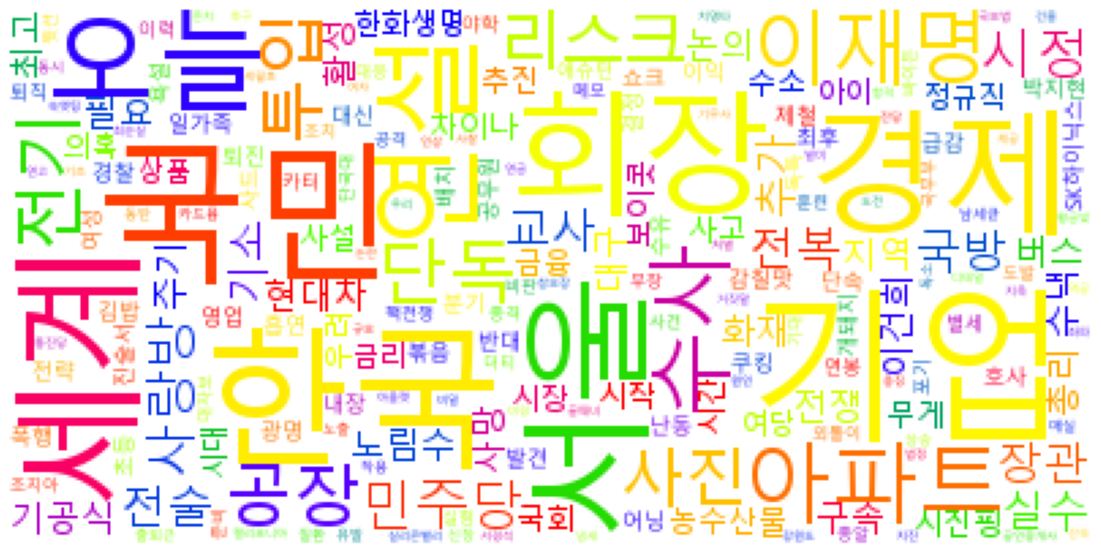

In [149]:
middle_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(middle_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(middle_title_word_cloud)
plt.axis('off')

In [150]:
middle_content_vocab = {}
middle_preprocessed_contents = []
for sentence in whole_middle_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in middle_content_vocab:
                middle_content_vocab[word] = 0 
            middle_content_vocab[word] += 1
            middle_preprocessed_contents.append(word) 
middle_content_counter = Counter(middle_preprocessed_contents)
middle_content_counter

Counter({'사시사철': 1,
         '식재료': 3,
         '.에서': 2,
         '조리법': 1,
         '레시피': 1,
         '감칠맛': 1,
         '대한민국': 28,
         '농수산': 5,
         '보양식': 2,
         '소비량': 1,
         '산란기': 2,
         '봄가을': 2,
         '영양분': 2,
         '신진대사': 1,
         '단백질': 1,
         '타우린': 1,
         '아르기닌': 1,
         '비타민': 3,
         '미네랄': 1,
         '칼로리': 1,
         '다이어트': 1,
         '농수산물': 8,
         '서비스': 6,
         '껍데기': 8,
         '업그레이드': 2,
         '숟가락': 2,
         '소금두꼬집': 1,
         '참기름': 3,
         '적당량': 3,
         '식용유': 2,
         '프라이팬': 1,
         '달걀말이': 1,
         '볶음밥': 2,
         '에디터': 2,
         '아파트': 37,
         '어머니': 9,
         '일가족': 1,
         '광명경찰서': 1,
         '광명시': 1,
         '소하동': 1,
         '관계자': 32,
         '박지현': 2,
         '더불어민주당': 20,
         '선대위원장': 1,
         '이재명': 20,
         '비대위원장': 2,
         '위원장': 33,
         '페이스북': 6,
         '윤석열': 32,
         '전대미문': 1,
         '민주당': 32,


(-0.5, 399.5, 199.5, -0.5)

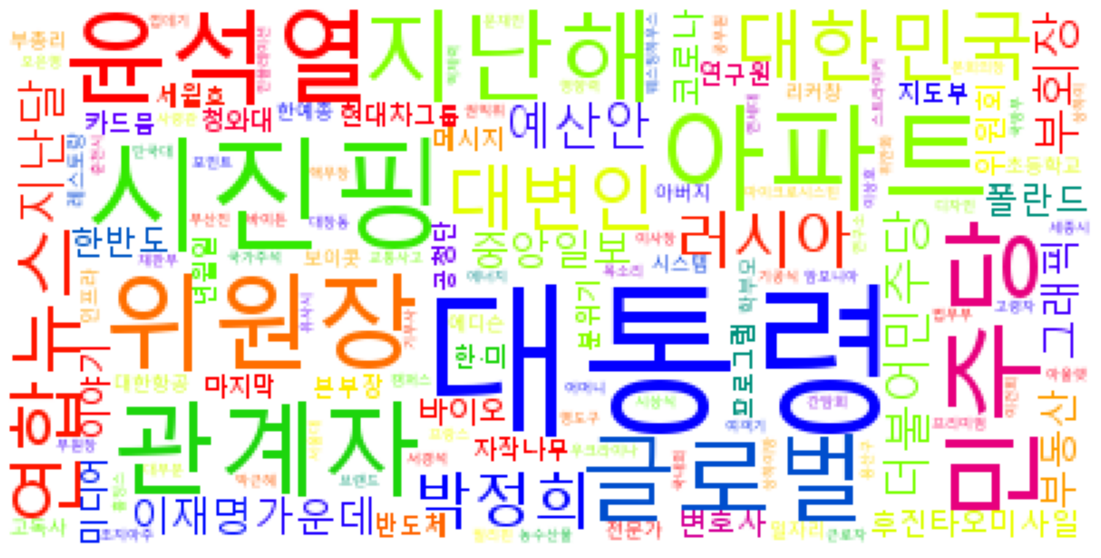

In [151]:
middle_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(middle_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(middle_content_cloud)
plt.axis('off')

### 머니투데이 데이터 유사성 구하기

In [152]:
whole_money_title_noun = []
for money_title in money_today_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(money_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_money_title_noun.append(noun)

In [153]:
whole_money_content_sentence_list = []
count = 1
for money_url in money_today_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(middle_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_money_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_money_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 56ms/step


In [155]:
whole_money_content_noun = []
count = 1
for content in whole_money_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_money_content_noun.append(noun)

1/1 [==============================] - 0s 62ms/step


In [156]:
money_tail_100_database = pd.DataFrame(money_today_database.tail(100).values, columns=money_today_database.columns)
money_tail_100_database

title  \
0                신세계푸드, '더 베러' 누적방문객 5000명   
1       코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등   
2         HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"   
3    [속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"   
4        [속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"   
..                                     ...   
95                        [광화문]청문회 대상은 국회다   
96                    머니투데이 오프라인 헤드라인-26일자   
97  [사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다   
98                      [MT시평]금융업의 본질은 신뢰다   
99      [투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견   

                                              content  \
0   신세계푸드는 26일 서울 강남구 압구정동에서 운영 중인 대안육 콘셉트스토어 '더 베...   
1   미국 뉴욕증시가 3거래일 연속 강세를 보인 가운데 코스피는 보합권 공방을 벌이고 있...   
2   HK이노엔이 위식도역류질환 신약 '케이캡'(성분명 테고프라잔)으로 유럽 시장 공략에...   
3                    ] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.   
4                    ] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.   
..                                                ...   
95  판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주...   
96  "대형증권사, 제2 채안펀드 1조 만들라" 촉법소년 '만 13세' 하향…"더 낮춰야...   
97  34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시...   
98  동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 ...   
99  지난 7월말 일본의 하기우다 고이치 경제산업상은 구글 본사를 시찰한 후 기자회견을 ...   

                                                  url  
0   https://n.news.naver.com/mnews/article/008/000...  
1   https://n.news.naver.com/mnews/article/008/000...  
2   https://n.news.naver.com/mnews/article/008/000...  
3   https://n.news.naver.com/mnews/article/008/000...  
4   https://n.news.naver.com/mnews/article/008/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/008/000...  
96  https://n.news.naver.com/mnews/article/008/000...  
97  https://n.news.naver.com/mnews/article/008/000...  
98  https://n.news.naver.com/mnews/article/008/000...  
99  https://n.news.naver.com/mnews/article/008/000...  

[100 rows x 3 columns]

In [157]:
money_title_content_vocab = list(set(whole_middle_title_noun + whole_money_content_noun))
money_title_content_vocab.sort()

In [158]:
money_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(money_tail_100_database["title"])):
  money_title_tfidf_result.append([])
  try:
    d = money_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(money_title_content_vocab)):
      money_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(money_title_content_vocab)):
      t = money_title_content_vocab[j]
      money_title_tfidf_result[-1].append(tfidf(t, d))

# len(result)
money_title_tfidf_ = pd.DataFrame(money_title_tfidf_result, columns=money_title_content_vocab, index=money_tail_100_database["title"])
money_title_tfidf_

3관왕  BGF리테일  SK하이닉스  [반퇴  감칠맛  강원도  \
title                                                                        
신세계푸드, '더 베러' 누적방문객 5000명               0.0     0.0     0.0  0.0  0.0  0.0   
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등      0.0     0.0     0.0  0.0  0.0  0.0   
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"        0.0     0.0     0.0  0.0  0.0  0.0   
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"   0.0     0.0     0.0  0.0  0.0  0.0   
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"       0.0     0.0     0.0  0.0  0.0  0.0   
...                                     ...     ...     ...  ...  ...  ...   
[광화문]청문회 대상은 국회다                        0.0     0.0     0.0  0.0  0.0  0.0   
머니투데이 오프라인 헤드라인-26일자                    0.0     0.0     0.0  0.0  0.0  0.0   
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다  0.0     0.0     0.0  0.0  0.0  0.0   
[MT시평]금융업의 본질은 신뢰다                      0.0     0.0     0.0  0.0  0.0  0.0   
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견      0.0     0.0     0.0  0.0  0.0  0.0   

                                        개돼지  거짓말  경쟁력  고독사  ...  폴란드  피케팅  \
title                                                       ...             
신세계푸드, '더 베러' 누적방문객 5000명               0.0  0.0  0.0  0.0  ...  0.0  0.0   
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등      0.0  0.0  0.0  0.0  ...  0.0  0.0   
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"        0.0  0.0  0.0  0.0  ...  0.0  0.0   
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"   0.0  0.0  0.0  0.0  ...  0.0  0.0   
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"       0.0  0.0  0.0  0.0  ...  0.0  0.0   
...                                     ...  ...  ...  ...  ...  ...  ...   
[광화문]청문회 대상은 국회다                        0.0  0.0  0.0  0.0  ...  0.0  0.0   
머니투데이 오프라인 헤드라인-26일자                    0.0  0.0  0.0  0.0  ...  0.0  0.0   
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다  0.0  0.0  0.0  0.0  ...  0.0  0.0   
[MT시평]금융업의 본질은 신뢰다                      0.0  0.0  0.0  0.0  ...  0.0  0.0   
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견      0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                        하남시  한예종  한화생명  헌정사  현대차  확진자  황금빛  \
title                                                                        
신세계푸드, '더 베러' 누적방문객 5000명               0.0  0.0   0.0  0.0  0.0  0.0  0.0   
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등      0.0  0.0   0.0  0.0  0.0  0.0  0.0   
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"        0.0  0.0   0.0  0.0  0.0  0.0  0.0   
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"       0.0  0.0   0.0  0.0  0.0  0.0  0.0   
...                                     ...  ...   ...  ...  ...  ...  ...   
[광화문]청문회 대상은 국회다                        0.0  0.0   0.0  0.0  0.0  0.0  0.0   
머니투데이 오프라인 헤드라인-26일자                    0.0  0.0   0.0  0.0  0.0  0.0  0.0   
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
[MT시평]금융업의 본질은 신뢰다                      0.0  0.0   0.0  0.0  0.0  0.0  0.0   
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견      0.0  0.0   0.0  0.0  0.0  0.0  0.0   

                                        후진타오  
title                                         
신세계푸드, '더 베러' 누적방문객 5000명                0.0  
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등       0.0  
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"         0.0  
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"    0.0  
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"        0.0  
...                                      ...  
[광화문]청문회 대상은 국회다                         0.0  
머니투데이 오프라인 헤드라인-26일자                     0.0  
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다   0.0  
[MT시평]금융업의 본질은 신뢰다                       0.0  
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견       0.0  

[100 rows x 145 columns]

In [159]:
money_title_tfidf_.to_csv("money_tail_100_title_tfidf.csv", encoding='utf-8-sig')

In [164]:
money_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_money_content_sentence_list)):
  money_content_tfidf_result.append([])
  try:
    d = whole_money_content_sentence_list[i]
  except KeyError:
    for j in range(len(money_title_content_vocab)):
        money_content_tfidf_result[-1].append(0)
  else:
    for j in range(len(money_title_content_vocab)):
      t = money_title_content_vocab[j]
      money_content_tfidf_result[-1].append(tfidf(t, d))

# len(result)
money_content_tfidf_ = pd.DataFrame(money_content_tfidf_result, columns=money_title_content_vocab, index=money_tail_100_database["content"])
money_content_tfidf_

3관왕  BGF리테일  SK하이닉스  [반퇴  \
content                                                                        
신세계푸드는 26일 서울 강남구 압구정동에서 운영 중인 대안육 콘셉트스토어 '더 베러...  0.0     0.0     0.0  0.0   
미국 뉴욕증시가 3거래일 연속 강세를 보인 가운데 코스피는 보합권 공방을 벌이고 있다...  0.0     0.0     0.0  0.0   
HK이노엔이 위식도역류질환 신약 '케이캡'(성분명 테고프라잔)으로 유럽 시장 공략에 ...  0.0     0.0     0.0  0.0   
] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.                    0.0     0.0     0.0  0.0   
] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.                    0.0     0.0     0.0  0.0   
...                                                 ...     ...     ...  ...   
판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주당...  0.0     0.0     0.0  0.0   
"대형증권사, 제2 채안펀드 1조 만들라" 촉법소년 '만 13세' 하향…"더 낮춰야"...  0.0     0.0     0.0  0.0   
34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시간...  0.0     0.0     0.0  0.0   
동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 사...  0.0     0.0     0.0  0.0   
지난 7월말 일본의 하기우다 고이치 경제산업상은 구글 본사를 시찰한 후 기자회견을 통...  0.0     0.0     0.0  0.0   

                                                    감칠맛  강원도  개돼지  거짓말  경쟁력  \
content                                                                       
신세계푸드는 26일 서울 강남구 압구정동에서 운영 중인 대안육 콘셉트스토어 '더 베러...  0.0  0.0  0.0  0.0  0.0   
미국 뉴욕증시가 3거래일 연속 강세를 보인 가운데 코스피는 보합권 공방을 벌이고 있다...  0.0  0.0  0.0  0.0  0.0   
HK이노엔이 위식도역류질환 신약 '케이캡'(성분명 테고프라잔)으로 유럽 시장 공략에 ...  0.0  0.0  0.0  0.0  0.0   
] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.                    0.0  0.0  0.0  0.0  0.0   
] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.                    0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주당...  0.0  0.0  0.0  0.0  0.0   
"대형증권사, 제2 채안펀드 1조 만들라" 촉법소년 '만 13세' 하향…"더 낮춰야"...  0.0  0.0  0.0  0.0  0.0   
34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시간...  0.0  0.0  0.0  0.0  0.0   
동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 사...  0.0  0.0  0.0  0.0  0.0   
지난 7월말 일본의 하기우다 고이치 경제산업상은 구글 본사를 시찰한 후 기자회견을 통...  0.0  0.0  0.0  0.0  0.0   

                                                    고독사  ...  폴란드       피케팅  \
content                                                  ...                  
신세계푸드는 26일 서울 강남구 압구정동에서 운영 중인 대안육 콘셉트스토어 '더 베러...  0.0  ...  0.0  1.386294   
미국 뉴욕증시가 3거래일 연속 강세를 보인 가운데 코스피는 보합권 공방을 벌이고 있다...  0.0  ...  0.0  1.386294   
HK이노엔이 위식도역류질환 신약 '케이캡'(성분명 테고프라잔)으로 유럽 시장 공략에 ...  0.0  ...  0.0  1.386294   
] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.                    0.0  ...  0.0  1.386294   
] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.                    0.0  ...  0.0  1.386294   
...                                                 ...  ...  ...       ...   
판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주당...  0.0  ...  0.0  1.386294   
"대형증권사, 제2 채안펀드 1조 만들라" 촉법소년 '만 13세' 하향…"더 낮춰야"...  0.0  ...  0.0  1.386294   
34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시간...  0.0  ...  0.0  1.386294   
동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 사...  0.0  ...  0.0  1.386294   
지난 7월말 일본의 하기우다 고이치 경제산업상은 구글 본사를 시찰한 후 기자회견을 통...  0.0  ...  0.0  1.386294   

                                                    하남시  한예종  한화생명       헌정사  \
content                                                                        
신세계푸드는 26일 서울 강남구 압구정동에서 운영 중인 대안육 콘셉트스토어 '더 베러...  0.0  0.0   0.0  2.772589   
미국 뉴욕증시가 3거래일 연속 강세를 보인 가운데 코스피는 보합권 공방을 벌이고 있다...  0.0  0.0   0.0  2.772589   
HK이노엔이 위식도역류질환 신약 '케이캡'(성분명 테고프라잔)으로 유럽 시장 공략에 ...  0.0  0.0   0.0  2.772589   
] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.                    0.0  0.0   0.0  2.772589   
] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.                    0.0  0.0   0.0  2.772589   
...                                                 ...  ...   ...       ...   
판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주당...  0.0  0.0   0.0  2.772589   
"대형증권사, 제2 채안펀드 1조 만들라" 촉법소년 '만 13세' 하향…"더 낮춰야"...  0.0  0.0   0.0  2.772589   
34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시간...  0.0  0.0   0.0  2.772589   
동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 사...  0.0  0.0   0.0  2.77258

In [165]:
money_cos_sim_tfidf = np.dot(money_content_tfidf_.values,money_title_tfidf_.values.T)/(np.linalg.norm(money_title_tfidf_.values) * np.linalg.norm(money_content_tfidf_.values))
money_cos_sim_tfidf_ =pd.DataFrame(money_cos_sim_tfidf, columns=money_tail_100_database["content"], index = money_tail_100_database["title"])
money_cos_sim_tfidf_

content                                 신세계푸드는 26일 서울 강남구 압구정동에서 운영 중인 대안육 콘셉트스토어 '더 베러'(The Better)의 누적 방문객이 3 …  \
title                                                                                                               
신세계푸드, '더 베러' 누적방문객 5000명                                                             0.0                           
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등                                                    0.0                           
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"                                                      0.0                           
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"                                                 0.0                           
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"                                                     0.0                           
...                                                                                   ...                           
[광화문]청문회 대상은 국회다                                                                      0.0                           
머니투데이 오프라인 헤드라인-26일자                                                                  0.0                           
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다                                                0.0                           
[MT시평]금융업의 본질은 신뢰다                                                                    0.0                           
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견                                                    0.0                           

content                                 미국 뉴욕증시가 3거래일 연속 강세를 보인 가운데 코스피는 보합권 공방을 벌이고 있다. 외국인이 나흘째 순매수를 이어가고 있으나 …  \
title                                                                                                               
신세계푸드, '더 베러' 누적방문객 5000명                                                             0.0                           
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등                                                    0.0                           
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"                                                      0.0                           
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"                                                 0.0                           
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"                                                     0.0                           
...                                                                                   ...                           
[광화문]청문회 대상은 국회다                                                                      0.0                           
머니투데이 오프라인 헤드라인-26일자                                                                  0.0                           
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다                                                0.0                           
[MT시평]금융업의 본질은 신뢰다                                                                    0.0                           
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견                                                    0.0                           

content                                 HK이노엔이 위식도역류질환 신약 '케이캡'(성분명 테고프라잔)으로 유럽 시장 공략에 본격적으로 나선다. HK이노엔은 최근 유럽  …  \
title                                                                                                               
신세계푸드, '더 베러' 누적방문객 5000명                                                             0.0                           
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등                                                    0.0                           
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"                                                      0.0                           
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"                                                 0.0                           
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"                                                     0.0                           
...                                                                                   ...                           
[광화문]청문회 대상은 국회다    

In [166]:
money_cos_sim_tfidf_.to_csv("money_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [167]:
money_whole_title_sentence = []
for money_title in money_tail_100_database["title"]:
    kospacing_title_list = []
    list1 = str(money_title).split('.')
    title = ''
    for i in list1:
        title+=i
    money_whole_title_sentence.append(title)

In [168]:
money_title_vocab = {}
money_preprocessed_titles = []
for sentence in money_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in money_title_vocab:
                money_title_vocab[word] = 0 
            money_title_vocab[word] += 1
            money_preprocessed_titles.append(word)
money_title_counter = Counter(money_preprocessed_titles)
# print(money_title_counter)

(-0.5, 399.5, 199.5, -0.5)

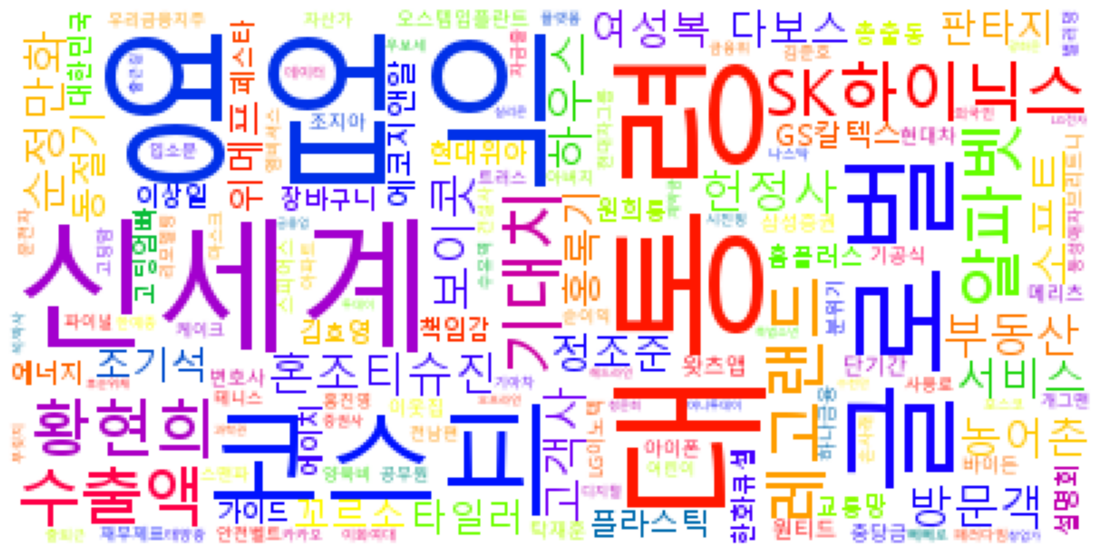

In [169]:
money_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(money_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(money_title_word_cloud)
plt.axis('off')

In [170]:
money_content_vocab = {}
money_preprocessed_contents = []
for sentence in whole_money_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in money_content_vocab:
                money_content_vocab[word] = 0 
            money_content_vocab[word] += 1
            money_preprocessed_contents.append(word) 
money_content_counter = Counter(money_preprocessed_contents)
money_content_counter

Counter({'윤석열': 100,
         '대통령': 100,
         '예산안': 200,
         '더불어민주당': 100,
         '이재명': 300,
         '총공세': 100,
         '정진석': 100,
         '위원장': 100,
         '임계점': 100,
         '대변인': 400,
         '헌정사': 200,
         '민주당': 400,
         '보이콧': 400,
         '대한민국': 100,
         '맹비난': 100,
         '국회의원': 100,
         '김미애': 100,
         '본회의장': 100,
         '주호영': 100,
         '국회법': 100,
         '김기현': 100,
         '페이스북': 100,
         '대통령실': 100,
         '관계자': 100,
         '특정인': 100})

(-0.5, 399.5, 199.5, -0.5)

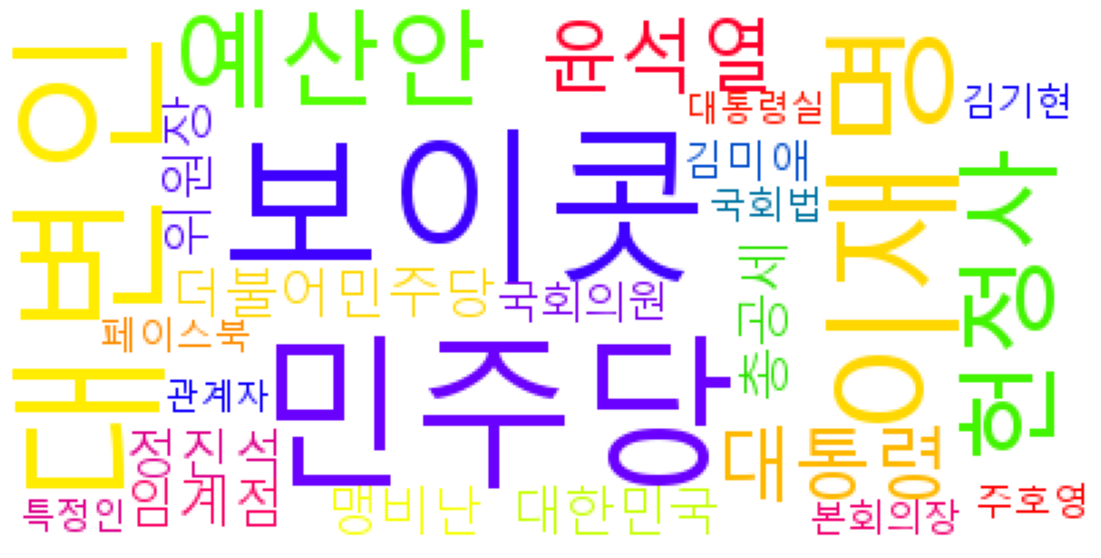

In [171]:
money_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(money_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(money_content_cloud)
plt.axis('off')